<a href="https://colab.research.google.com/github/RonitGandhi/PSL-RA/blob/main/Craven_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network Models


**Feedforward Neural Network**

The feedforward neural network will take the current inputs and predict the current outputs.

**Autoregressive Neural Network**

The autoregressive neural network will use the current inputs and the previous time step's predicted outputs to predict the current outputs.

## FF AND AR MODELS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = '/content/craven_data_csv.csv'
data = pd.read_csv(file_path)

# Separate inputs (first 5 columns) and outputs (next 5 columns)
inputs = data.iloc[:, :5].values
outputs = data.iloc[:, 5:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, shuffle=False)

# Normalize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Define and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

# Make predictions
ff_predictions_scaled = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test_scaled, ff_predictions_scaled)
print(f'Mean Squared Error: {mse}')

# Inverse transform the predictions and actual values
ff_predictions = scaler_y.inverse_transform(ff_predictions_scaled)
y_test = scaler_y.inverse_transform(y_test_scaled)

# Save actual vs predicted values to CSV
results = pd.DataFrame({
    'Actual_1': y_test[:, 0],
    'Predicted_FF_1': ff_predictions[:, 0],
    'Actual_2': y_test[:, 1],
    'Predicted_FF_2': ff_predictions[:, 1],
    'Actual_3': y_test[:, 2],
    'Predicted_FF_3': ff_predictions[:, 2],
    'Actual_4': y_test[:, 3],
    'Predicted_FF_4': ff_predictions[:, 3],
    'Actual_5': y_test[:, 4],
    'Predicted_FF_5': ff_predictions[:, 4]
})

results.to_csv('/mnt/data/actual_vs_predicted.csv', index=False)

# Plotting
plt.figure(figsize=(12, 8))

for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.plot(y_test[:, i], label='Actual')
    plt.plot(ff_predictions[:, i], label='Predicted')
    plt.title(f'Output {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
151/151 [==============================] - 1s 2ms/step - loss: 0.0693
Epoch 2/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 3/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 4/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 5/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 6/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 7/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 8/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 9/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 10/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 11/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 12/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 13/100


Understanding the MATLAB Code and Reference Links
1. Feedforward Neural Network (nn_FF_time.m):
The MATLAB script likely defines a feedforward neural network (FFNN) for time series prediction.
Key points:
Input data consists of the current time step features.
Output data consists of the current time step target values.
The network might include layers like feedforwardnet or similar, with specified training functions.
2. Autoregressive Neural Network (nn_AR_time.m):
The MATLAB script likely defines an autoregressive network (NARX) where the output at the previous time step is used as an input feature.
Key points:
Input data consists of the current time step features and the previous time step target values.
Output data consists of the current time step target values.
The network might include layers like narxnet or similar, with feedback loops for autoregression.

## Further improved R2

Epoch 1/300
136/136 [==============================] - 12s 35ms/step - loss: 0.4382 - val_loss: 0.1845 - lr: 0.0010
Epoch 2/300
136/136 [==============================] - 5s 33ms/step - loss: 0.1532 - val_loss: 0.0770 - lr: 0.0010
Epoch 3/300
136/136 [==============================] - 4s 32ms/step - loss: 0.0976 - val_loss: 0.0702 - lr: 0.0010
Epoch 4/300
136/136 [==============================] - 4s 29ms/step - loss: 0.0741 - val_loss: 0.0459 - lr: 0.0010
Epoch 5/300
136/136 [==============================] - 3s 24ms/step - loss: 0.0628 - val_loss: 0.0337 - lr: 0.0010
Epoch 6/300
136/136 [==============================] - 2s 17ms/step - loss: 0.0527 - val_loss: 0.0277 - lr: 0.0010
Epoch 7/300
136/136 [==============================] - 3s 24ms/step - loss: 0.0464 - val_loss: 0.0260 - lr: 0.0010
Epoch 8/300
136/136 [==============================] - 2s 14ms/step - loss: 0.0427 - val_loss: 0.0227 - lr: 0.0010
Epoch 9/300
136/136 [==============================] - 2s 14ms/step - loss: 0.0

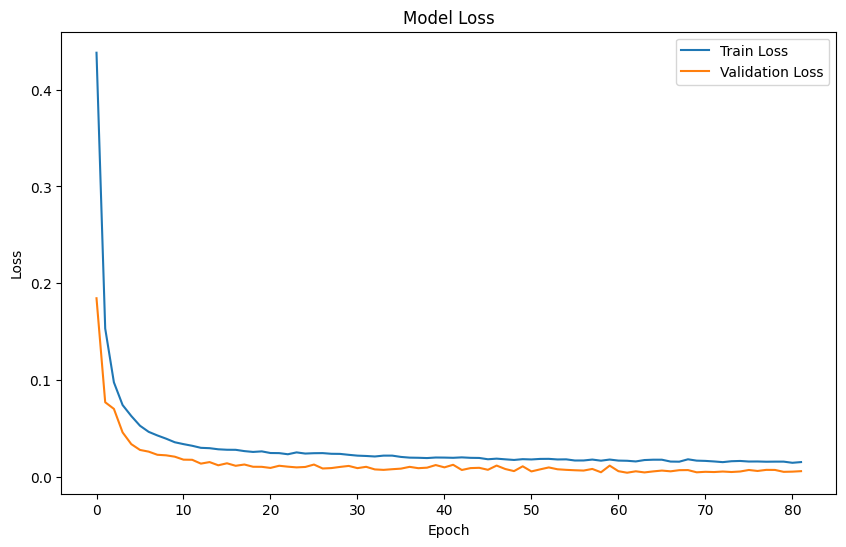

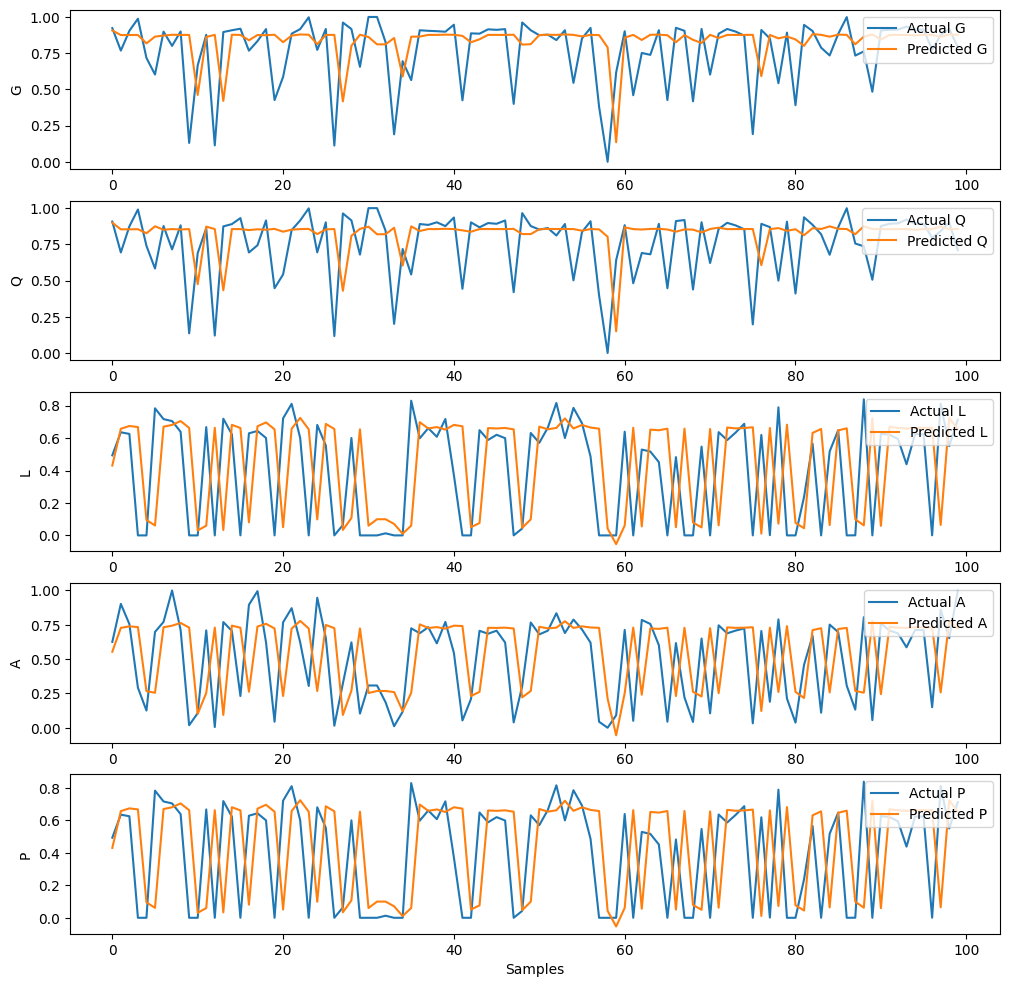

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['Time', 'pH', 'T', 'DO', 'F']
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

X = data[input_cols].values
y = data[output_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to have a time step dimension
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the GRU model
model = Sequential()
model.add(GRU(256, activation='relu', return_sequences=True, input_shape=(1, len(input_cols))))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(GRU(128, activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(GRU(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(output_cols)))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
test_predictions = []
test_input = X_test[0].reshape(1, 1, -1)

for i in range(len(X_test)):
    if i > 0:
        test_input[:, :, len(input_cols)-len(output_cols):] = y_test[i-1]

    pred = model.predict(test_input)
    test_predictions.append(pred)

test_predictions = np.array(test_predictions).squeeze()

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_gru_improved.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values with a smaller x-axis range
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Only with 4 cols - Updated Script for Sequence Input


Epoch 1/300
136/136 [==============================] - 18s 92ms/step - loss: 0.2438 - val_loss: 0.0925 - lr: 0.0010
Epoch 2/300
136/136 [==============================] - 12s 89ms/step - loss: 0.1103 - val_loss: 0.0728 - lr: 0.0010
Epoch 3/300
136/136 [==============================] - 12s 90ms/step - loss: 0.0886 - val_loss: 0.0656 - lr: 0.0010
Epoch 4/300
136/136 [==============================] - 11s 81ms/step - loss: 0.0795 - val_loss: 0.0638 - lr: 0.0010
Epoch 5/300
136/136 [==============================] - 12s 87ms/step - loss: 0.0739 - val_loss: 0.0571 - lr: 0.0010
Epoch 6/300
136/136 [==============================] - 12s 90ms/step - loss: 0.0694 - val_loss: 0.0552 - lr: 0.0010
Epoch 7/300
136/136 [==============================] - 12s 90ms/step - loss: 0.0664 - val_loss: 0.0540 - lr: 0.0010
Epoch 8/300
136/136 [==============================] - 12s 90ms/step - loss: 0.0636 - val_loss: 0.0549 - lr: 0.0010
Epoch 9/300
136/136 [==============================] - 12s 91ms/step - l

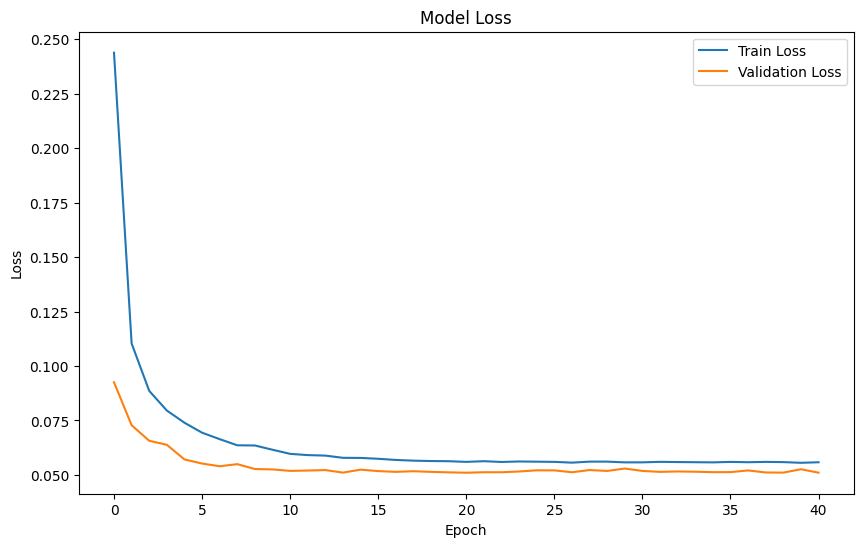

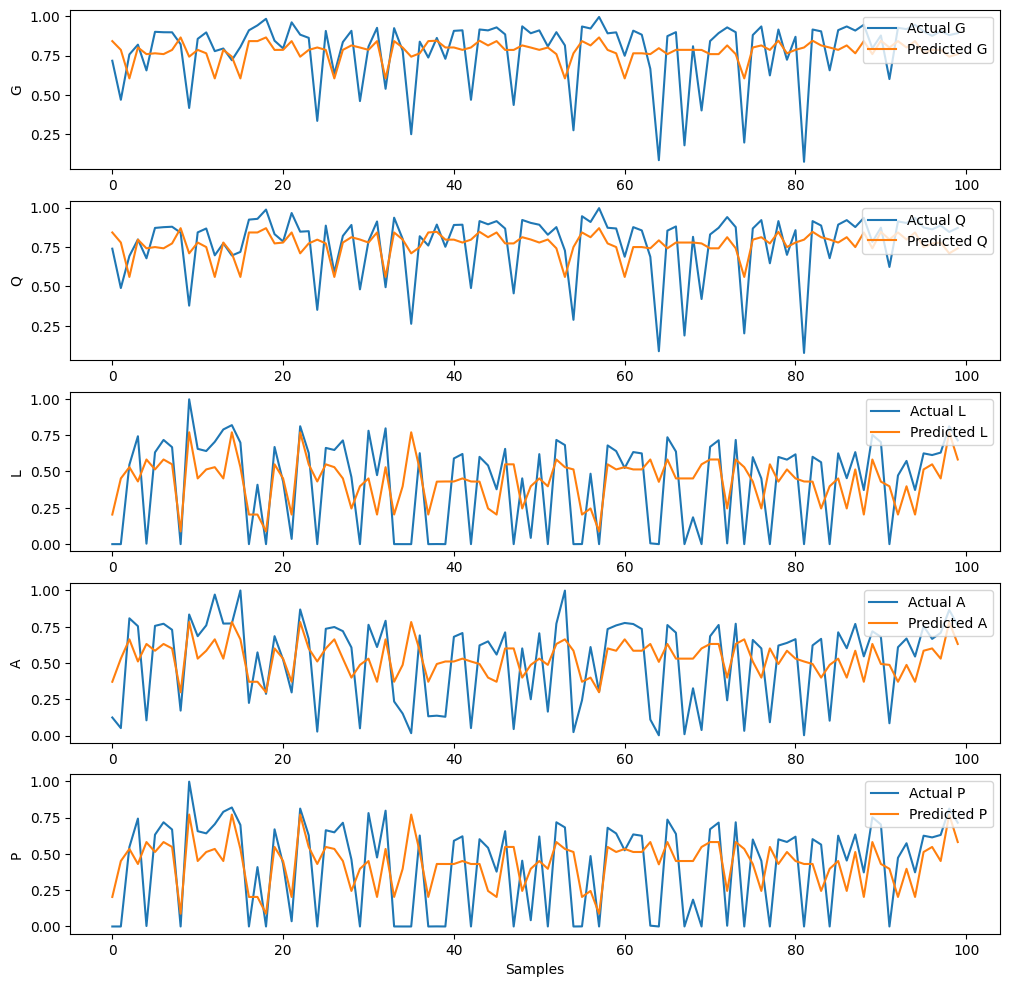

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['pH', 'T', 'DO', 'F']
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

# Function to create sequences
def create_sequences(data, input_cols, output_cols, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[input_cols].iloc[i:i+time_steps].values)
        y.append(data[output_cols].iloc[i+time_steps].values)
    return np.array(X), np.array(y)

time_steps = 5
X, y = create_sequences(data, input_cols, output_cols, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the GRU model
model = Sequential()
model.add(GRU(512, activation='relu', return_sequences=True, input_shape=(time_steps, len(input_cols))))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(GRU(256, activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(GRU(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(output_cols)))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
test_predictions = []
for i in range(len(X_test)):
    test_input = X_test[i].reshape(1, time_steps, len(input_cols))
    pred = model.predict(test_input)
    test_predictions.append(pred)

test_predictions = np.array(test_predictions).squeeze()

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_gru_improved_sequence.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values with a smaller x-axis range
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Transformer Model

Epoch 1/100
136/136 [==============================] - 20s 76ms/step - loss: 0.2007 - val_loss: 0.0710 - lr: 0.0010
Epoch 2/100
136/136 [==============================] - 6s 44ms/step - loss: 0.1056 - val_loss: 0.0703 - lr: 0.0010
Epoch 3/100
136/136 [==============================] - 8s 55ms/step - loss: 0.0868 - val_loss: 0.0693 - lr: 0.0010
Epoch 4/100
136/136 [==============================] - 6s 44ms/step - loss: 0.0808 - val_loss: 0.0677 - lr: 0.0010
Epoch 5/100
136/136 [==============================] - 7s 54ms/step - loss: 0.0769 - val_loss: 0.0670 - lr: 0.0010
Epoch 6/100
136/136 [==============================] - 6s 44ms/step - loss: 0.0738 - val_loss: 0.0664 - lr: 0.0010
Epoch 7/100
136/136 [==============================] - 7s 53ms/step - loss: 0.0720 - val_loss: 0.0652 - lr: 0.0010
Epoch 8/100
136/136 [==============================] - 6s 47ms/step - loss: 0.0707 - val_loss: 0.0638 - lr: 0.0010
Epoch 9/100
136/136 [==============================] - 8s 56ms/step - loss: 0.0

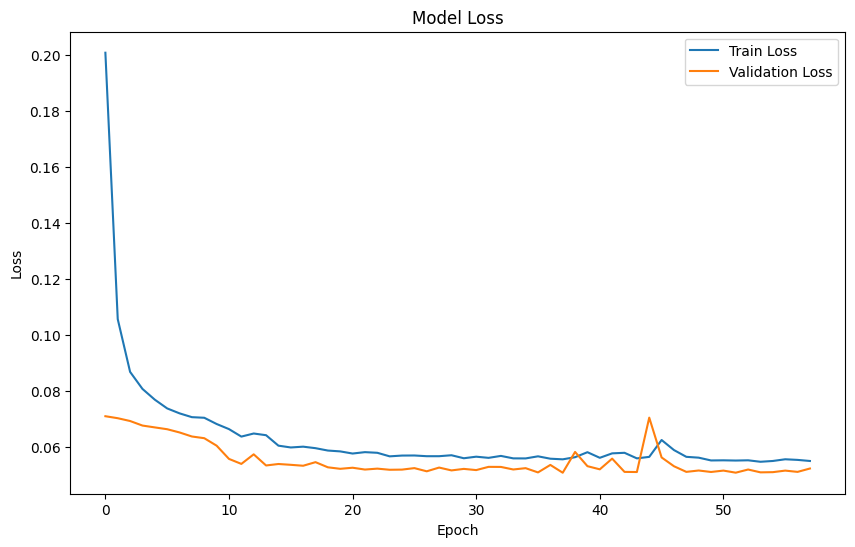

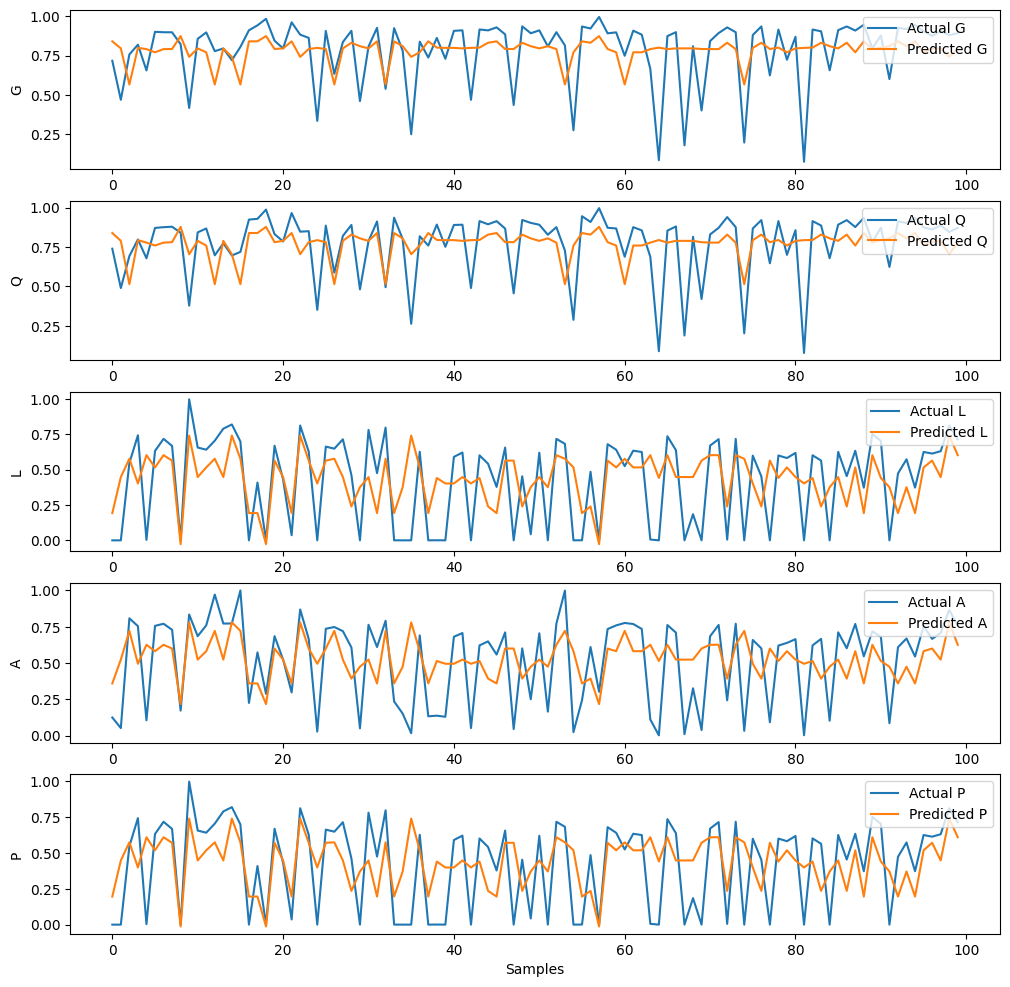

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['pH', 'T', 'DO', 'F']  # Time is implicit
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

# Function to create sequences
def create_sequences(data, input_cols, output_cols, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[input_cols].iloc[i:i+time_steps].values)
        y.append(data[output_cols].iloc[i+time_steps].values)
    return np.array(X), np.array(y)

time_steps = 5
X, y = create_sequences(data, input_cols, output_cols, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Transformer model
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = Add()([x, inputs])

    x = Dense(ff_dim, activation="relu")(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return Add()([x, res])

input_layer = Input(shape=(time_steps, len(input_cols)))
x = transformer_encoder(input_layer, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = Dense(100, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(len(output_cols))(x)
output_layer = x[:, -1, :]  # Get the last time step output

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
test_predictions = model.predict(X_test)

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_transformer.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values with a smaller x-axis range
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Ensemble Technique - GRU and transformer model

Epoch 1/300
136/136 [==============================] - 12s 50ms/step - loss: 0.4078 - val_loss: 0.1521 - lr: 0.0010
Epoch 2/300
136/136 [==============================] - 4s 32ms/step - loss: 0.1656 - val_loss: 0.0847 - lr: 0.0010
Epoch 3/300
136/136 [==============================] - 4s 33ms/step - loss: 0.1172 - val_loss: 0.0695 - lr: 0.0010
Epoch 4/300
136/136 [==============================] - 6s 46ms/step - loss: 0.0964 - val_loss: 0.0705 - lr: 0.0010
Epoch 5/300
136/136 [==============================] - 4s 33ms/step - loss: 0.0839 - val_loss: 0.0707 - lr: 0.0010
Epoch 6/300
136/136 [==============================] - 5s 34ms/step - loss: 0.0772 - val_loss: 0.0628 - lr: 0.0010
Epoch 7/300
136/136 [==============================] - 6s 45ms/step - loss: 0.0733 - val_loss: 0.0587 - lr: 0.0010
Epoch 8/300
136/136 [==============================] - 4s 33ms/step - loss: 0.0692 - val_loss: 0.0581 - lr: 0.0010
Epoch 9/300
136/136 [==============================] - 6s 41ms/step - loss: 0.0

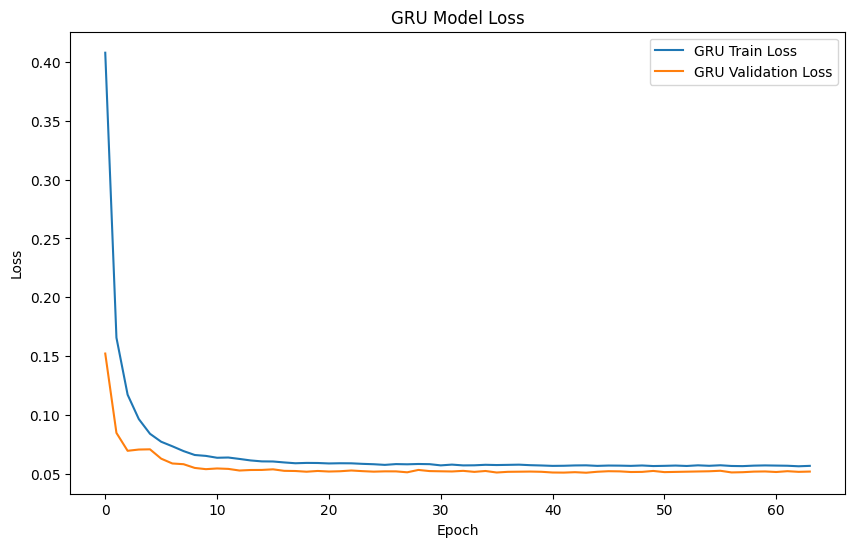

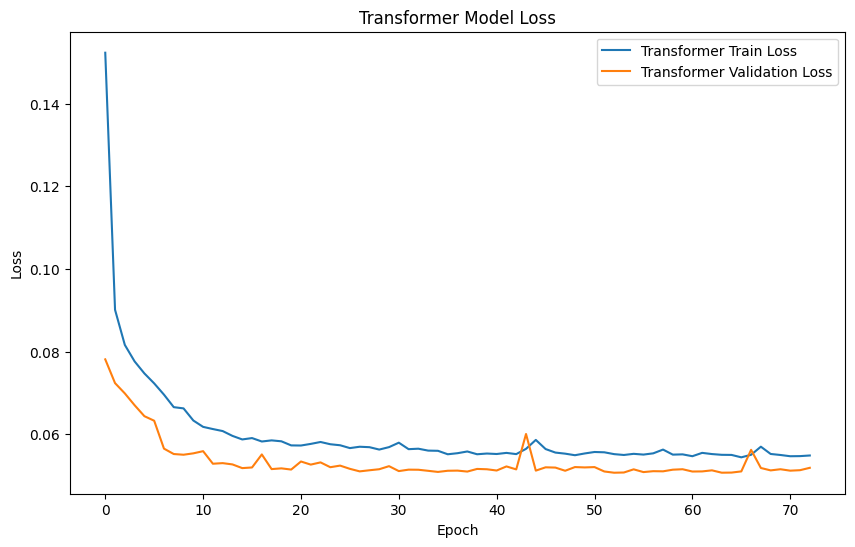

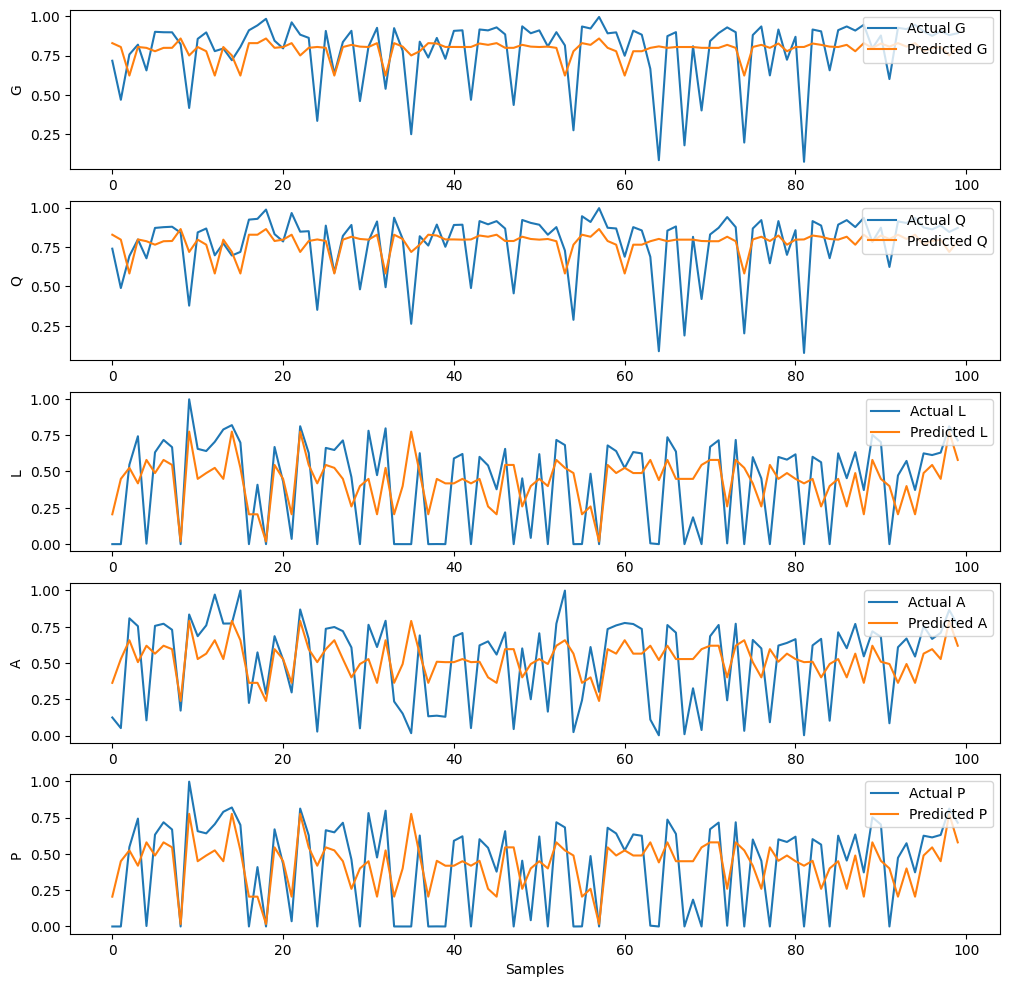

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Input, LayerNormalization, MultiHeadAttention, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['pH', 'T', 'DO', 'F']  # Time is implicit
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

# Function to create sequences
def create_sequences(data, input_cols, output_cols, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[input_cols].iloc[i:i+time_steps].values)
        y.append(data[output_cols].iloc[i+time_steps].values)
    return np.array(X), np.array(y)

time_steps = 5
X, y = create_sequences(data, input_cols, output_cols, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the GRU model
gru_model = Sequential()
gru_model.add(GRU(256, activation='relu', return_sequences=True, input_shape=(time_steps, len(input_cols))))
gru_model.add(BatchNormalization())
gru_model.add(Dropout(0.4))
gru_model.add(GRU(128, activation='relu', return_sequences=True))
gru_model.add(BatchNormalization())
gru_model.add(Dropout(0.4))
gru_model.add(GRU(64, activation='relu'))
gru_model.add(BatchNormalization())
gru_model.add(Dense(64, activation='relu'))
gru_model.add(Dropout(0.4))
gru_model.add(Dense(32, activation='relu'))
gru_model.add(Dropout(0.4))
gru_model.add(Dense(len(output_cols)))

gru_model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history_gru = gru_model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Define the Transformer model
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = Add()([x, inputs])

    x = Dense(ff_dim, activation="relu")(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return Add()([x, res])

input_layer = Input(shape=(time_steps, len(input_cols)))
x = transformer_encoder(input_layer, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = Dense(100, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(len(output_cols))(x)
output_layer = x[:, -1, :]  # Get the last time step output

transformer_model = Model(inputs=input_layer, outputs=output_layer)
transformer_model.compile(optimizer='adam', loss='mse')

history_transformer = transformer_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
gru_predictions = gru_model.predict(X_test)
transformer_predictions = transformer_model.predict(X_test)

# Ensemble Predictions
ensemble_predictions = (gru_predictions + transformer_predictions) / 2

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = ensemble_predictions[:, i]

comparison_df.to_csv('comparison_ensemble.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, ensemble_predictions)
mae = mean_absolute_error(y_test, ensemble_predictions)
r2 = r2_score(y_test, ensemble_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values for GRU
plt.figure(figsize=(10, 6))
plt.plot(history_gru.history['loss'], label='GRU Train Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation loss values for Transformer
plt.figure(figsize=(10, 6))
plt.plot(history_transformer.history['loss'], label='Transformer Train Loss')
plt.plot(history_transformer.history['val_loss'], label='Transformer Validation Loss')
plt.title('Transformer Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values with a smaller x-axis range
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(ensemble_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Stacked Ensemble

Epoch 1/300
136/136 [==============================] - 12s 37ms/step - loss: 0.5201 - val_loss: 0.1258 - lr: 0.0010
Epoch 2/300
136/136 [==============================] - 6s 44ms/step - loss: 0.1677 - val_loss: 0.0834 - lr: 0.0010
Epoch 3/300
136/136 [==============================] - 5s 34ms/step - loss: 0.1210 - val_loss: 0.0734 - lr: 0.0010
Epoch 4/300
136/136 [==============================] - 4s 33ms/step - loss: 0.1030 - val_loss: 0.0719 - lr: 0.0010
Epoch 5/300
136/136 [==============================] - 6s 46ms/step - loss: 0.0907 - val_loss: 0.0627 - lr: 0.0010
Epoch 6/300
136/136 [==============================] - 4s 33ms/step - loss: 0.0840 - val_loss: 0.0615 - lr: 0.0010
Epoch 7/300
136/136 [==============================] - 5s 34ms/step - loss: 0.0777 - val_loss: 0.0565 - lr: 0.0010
Epoch 8/300
136/136 [==============================] - 7s 48ms/step - loss: 0.0745 - val_loss: 0.0569 - lr: 0.0010
Epoch 9/300
136/136 [==============================] - 5s 33ms/step - loss: 0.0

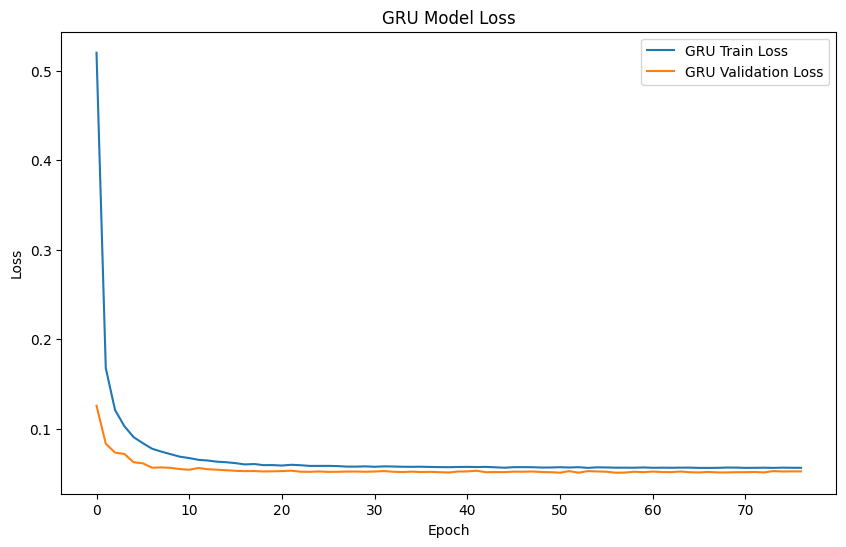

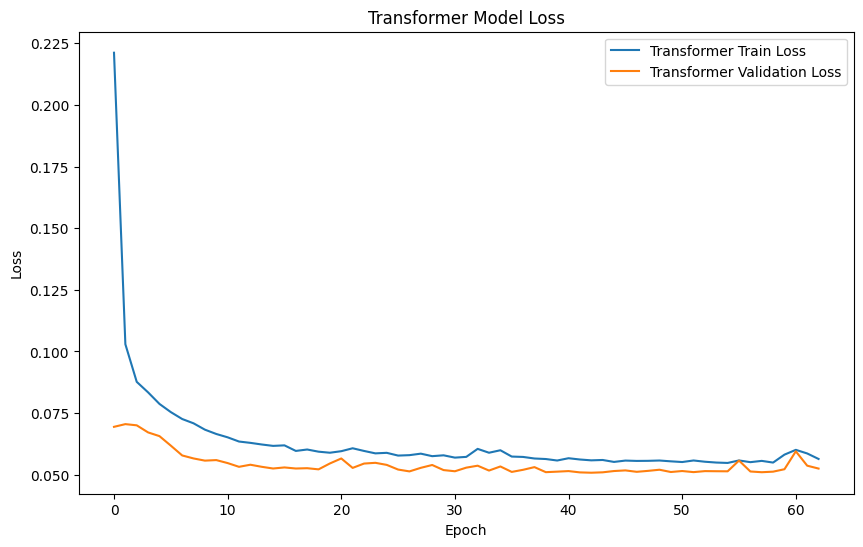

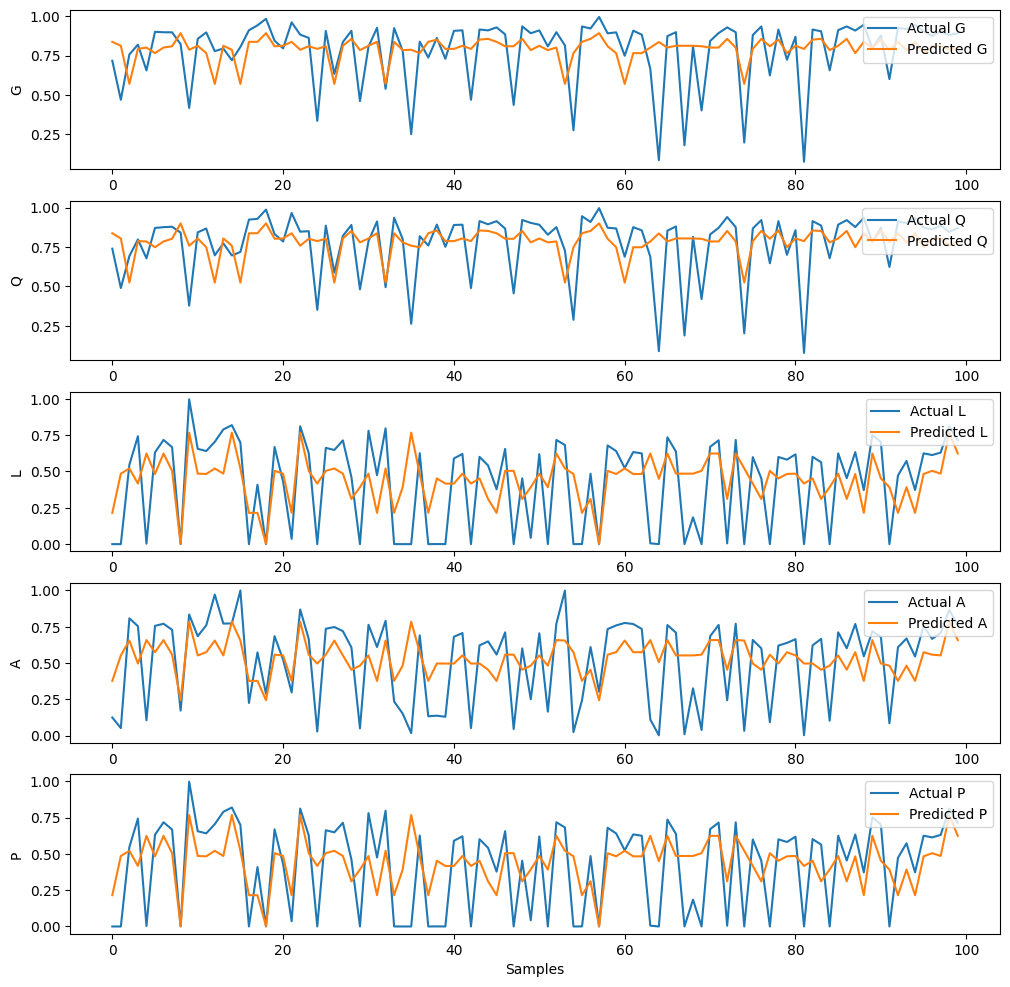

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Input, LayerNormalization, MultiHeadAttention, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['pH', 'T', 'DO', 'F']  # Time is implicit
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

# Function to create sequences
def create_sequences(data, input_cols, output_cols, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[input_cols].iloc[i:i+time_steps].values)
        y.append(data[output_cols].iloc[i+time_steps].values)
    return np.array(X), np.array(y)

time_steps = 5
X, y = create_sequences(data, input_cols, output_cols, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the GRU model
gru_model = Sequential()
gru_model.add(GRU(256, activation='relu', return_sequences=True, input_shape=(time_steps, len(input_cols))))
gru_model.add(BatchNormalization())
gru_model.add(Dropout(0.4))
gru_model.add(GRU(128, activation='relu', return_sequences=True))
gru_model.add(BatchNormalization())
gru_model.add(Dropout(0.4))
gru_model.add(GRU(64, activation='relu'))
gru_model.add(BatchNormalization())
gru_model.add(Dense(64, activation='relu'))
gru_model.add(Dropout(0.4))
gru_model.add(Dense(32, activation='relu'))
gru_model.add(Dropout(0.4))
gru_model.add(Dense(len(output_cols)))

gru_model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history_gru = gru_model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Define the Transformer model
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = Add()([x, inputs])

    x = Dense(ff_dim, activation="relu")(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return Add()([x, res])

input_layer = Input(shape=(time_steps, len(input_cols)))
x = transformer_encoder(input_layer, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = Dense(100, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(len(output_cols))(x)
output_layer = x[:, -1, :]  # Get the last time step output

transformer_model = Model(inputs=input_layer, outputs=output_layer)
transformer_model.compile(optimizer='adam', loss='mse')

history_transformer = transformer_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
gru_predictions = gru_model.predict(X_test)
transformer_predictions = transformer_model.predict(X_test)

# Combine Predictions for Meta-Model Training
combined_predictions = np.concatenate([gru_predictions, transformer_predictions], axis=1)

# Train Meta-Model
meta_model = LinearRegression()
meta_model.fit(combined_predictions, y_test)

# Meta-Model Predictions
meta_predictions = meta_model.predict(combined_predictions)

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = meta_predictions[:, i]

comparison_df.to_csv('comparison_stacked_ensemble.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, meta_predictions)
mae = mean_absolute_error(y_test, meta_predictions)
r2 = r2_score(y_test, meta_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values for GRU
plt.figure(figsize=(10, 6))
plt.plot(history_gru.history['loss'], label='GRU Train Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation loss values for Transformer
plt.figure(figsize=(10, 6))
plt.plot(history_transformer.history['loss'], label='Transformer Train Loss')
plt.plot(history_transformer.history['val_loss'], label='Transformer Validation Loss')
plt.title('Transformer Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values with a smaller x-axis range
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(meta_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## LSTM MODEL WITH TIME


Epoch 1/300
136/136 [==============================] - 9s 34ms/step - loss: 1.2032 - val_loss: 0.3033 - lr: 0.0010
Epoch 2/300
136/136 [==============================] - 6s 42ms/step - loss: 0.3503 - val_loss: 0.1553 - lr: 0.0010
Epoch 3/300
136/136 [==============================] - 4s 31ms/step - loss: 0.1765 - val_loss: 0.0773 - lr: 0.0010
Epoch 4/300
136/136 [==============================] - 4s 31ms/step - loss: 0.1109 - val_loss: 0.0486 - lr: 0.0010
Epoch 5/300
136/136 [==============================] - 6s 44ms/step - loss: 0.0809 - val_loss: 0.0369 - lr: 0.0010
Epoch 6/300
136/136 [==============================] - 4s 31ms/step - loss: 0.0641 - val_loss: 0.0366 - lr: 0.0010
Epoch 7/300
136/136 [==============================] - 4s 31ms/step - loss: 0.0537 - val_loss: 0.0359 - lr: 0.0010
Epoch 8/300
136/136 [==============================] - 6s 43ms/step - loss: 0.0472 - val_loss: 0.0293 - lr: 0.0010
Epoch 9/300
136/136 [==============================] - 4s 31ms/step - loss: 0.03

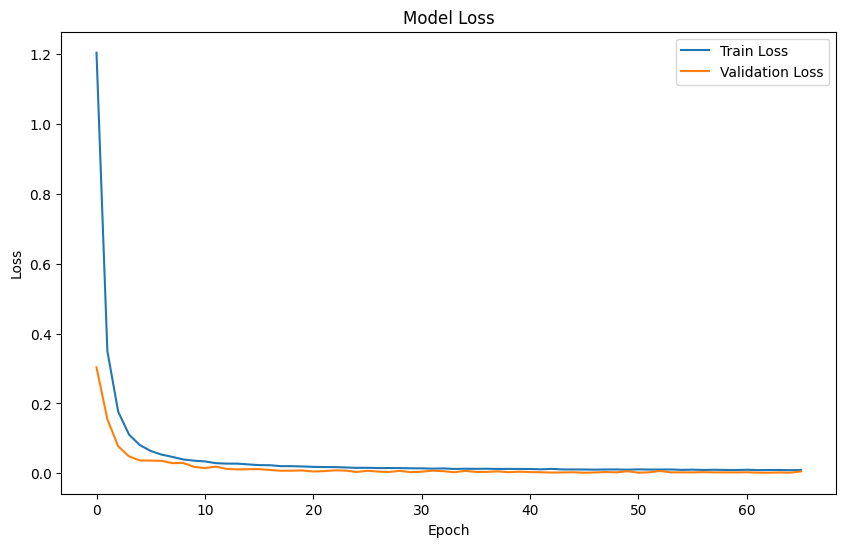

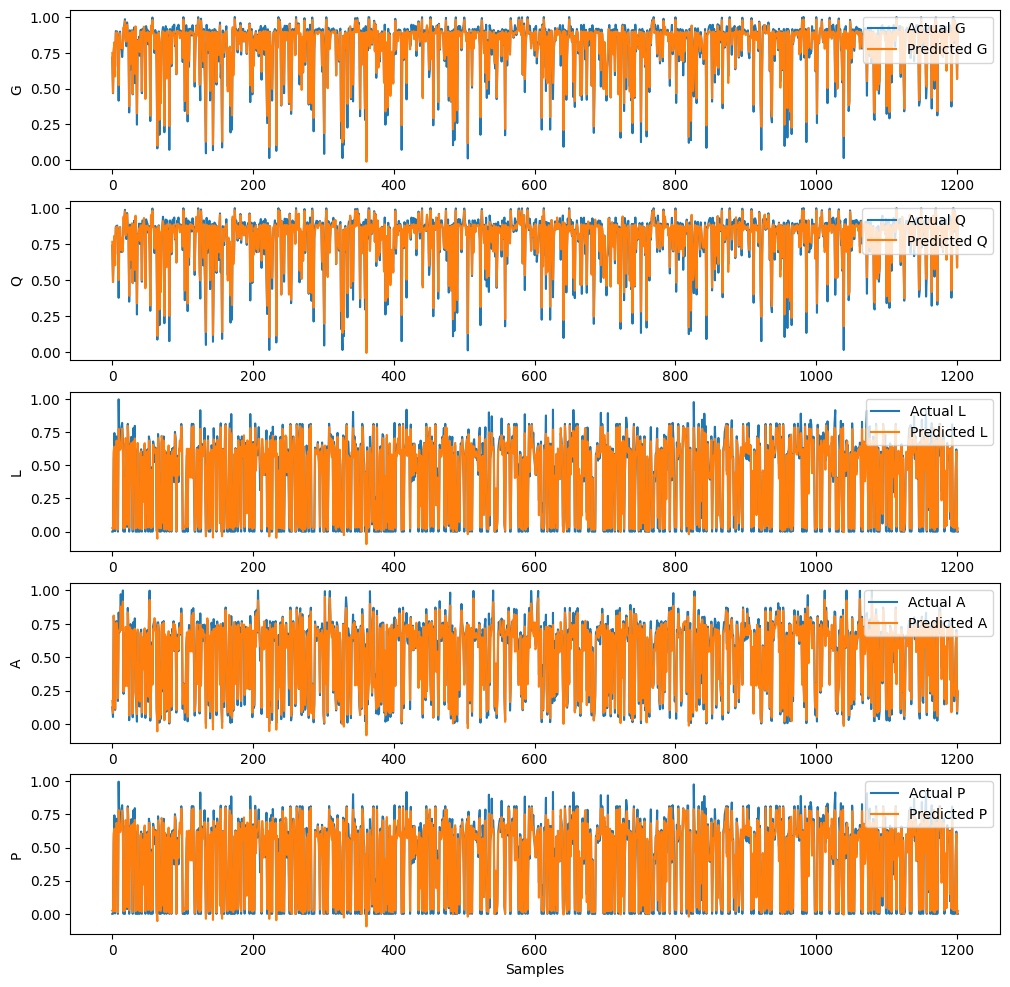

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['Time', 'pH', 'T', 'DO', 'F']
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

X = data[input_cols].values
y = data[output_cols].values

# Create sequences
def create_sequences(X, y, time_steps=5):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 5
X, y = create_sequences(X, y, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(time_steps, len(input_cols))))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(LSTM(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(output_cols)))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
test_predictions = model.predict(X_test)

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_lstm.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values
plt.figure(figsize=(12, 12))
sample_range = len(X_test)  # Plot all test samples
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Updated LSTM model - without Time

Epoch 1/300
135/135 [==============================] - 25s 146ms/step - loss: 3.0173 - val_loss: 2.1680 - lr: 0.0010
Epoch 2/300
135/135 [==============================] - 17s 128ms/step - loss: 1.8653 - val_loss: 1.5035 - lr: 0.0010
Epoch 3/300
135/135 [==============================] - 18s 133ms/step - loss: 1.2527 - val_loss: 0.9879 - lr: 0.0010
Epoch 4/300
135/135 [==============================] - 17s 129ms/step - loss: 0.8078 - val_loss: 0.6330 - lr: 0.0010
Epoch 5/300
135/135 [==============================] - 20s 150ms/step - loss: 0.5061 - val_loss: 0.3945 - lr: 0.0010
Epoch 6/300
135/135 [==============================] - 18s 130ms/step - loss: 0.3146 - val_loss: 0.2438 - lr: 0.0010
Epoch 7/300
135/135 [==============================] - 17s 129ms/step - loss: 0.2031 - val_loss: 0.1579 - lr: 0.0010
Epoch 8/300
135/135 [==============================] - 17s 127ms/step - loss: 0.1377 - val_loss: 0.1098 - lr: 0.0010
Epoch 9/300
135/135 [==============================] - 20s 146ms

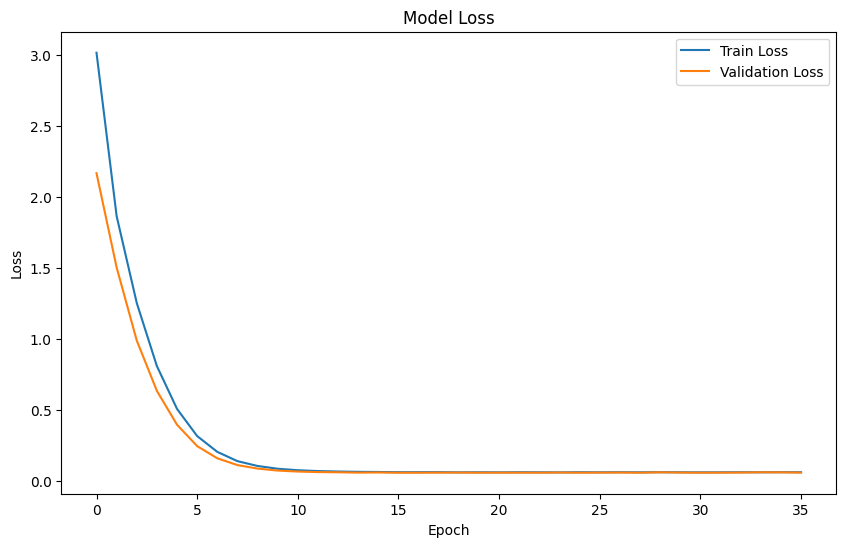

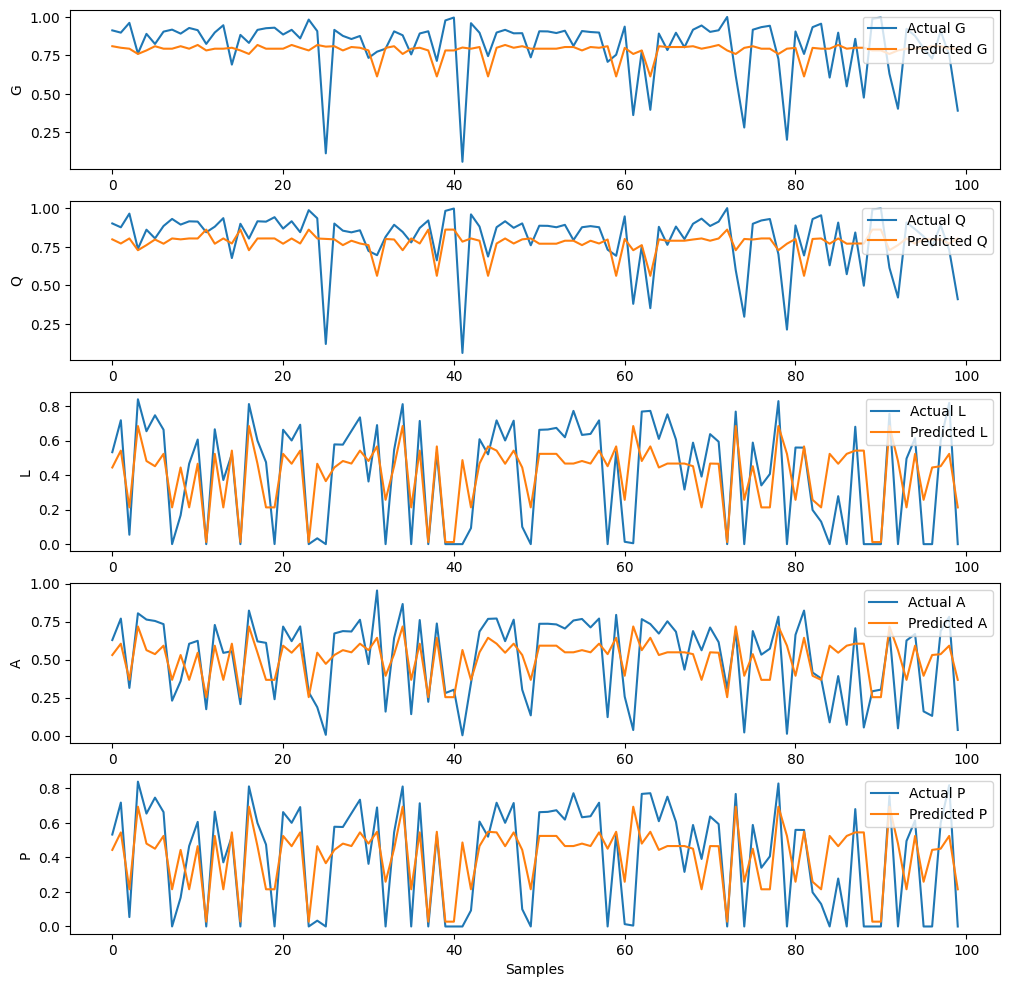

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['pH', 'T', 'DO', 'F']
output_cols = ['G', 'Q', 'L', 'A', 'P']

scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

X = data[input_cols].values
y = data[output_cols].values


def create_sequences(X, y, time_steps=10):
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X, y = create_sequences(X, y, time_steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###MODEL#############
model = Sequential()
model.add(Bidirectional(LSTM(256, activation='relu', return_sequences=True), input_shape=(time_steps, len(input_cols))))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))  ###########REGULARIZATION
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.4))
model.add(Dense(len(output_cols)))


model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)  ###########CHANGED

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

##########TESTING###########
test_predictions = model.predict(X_test)

comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_lstm_no_time_improved_v2.csv', index=False)

mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(12, 12))
sample_range = 100

for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


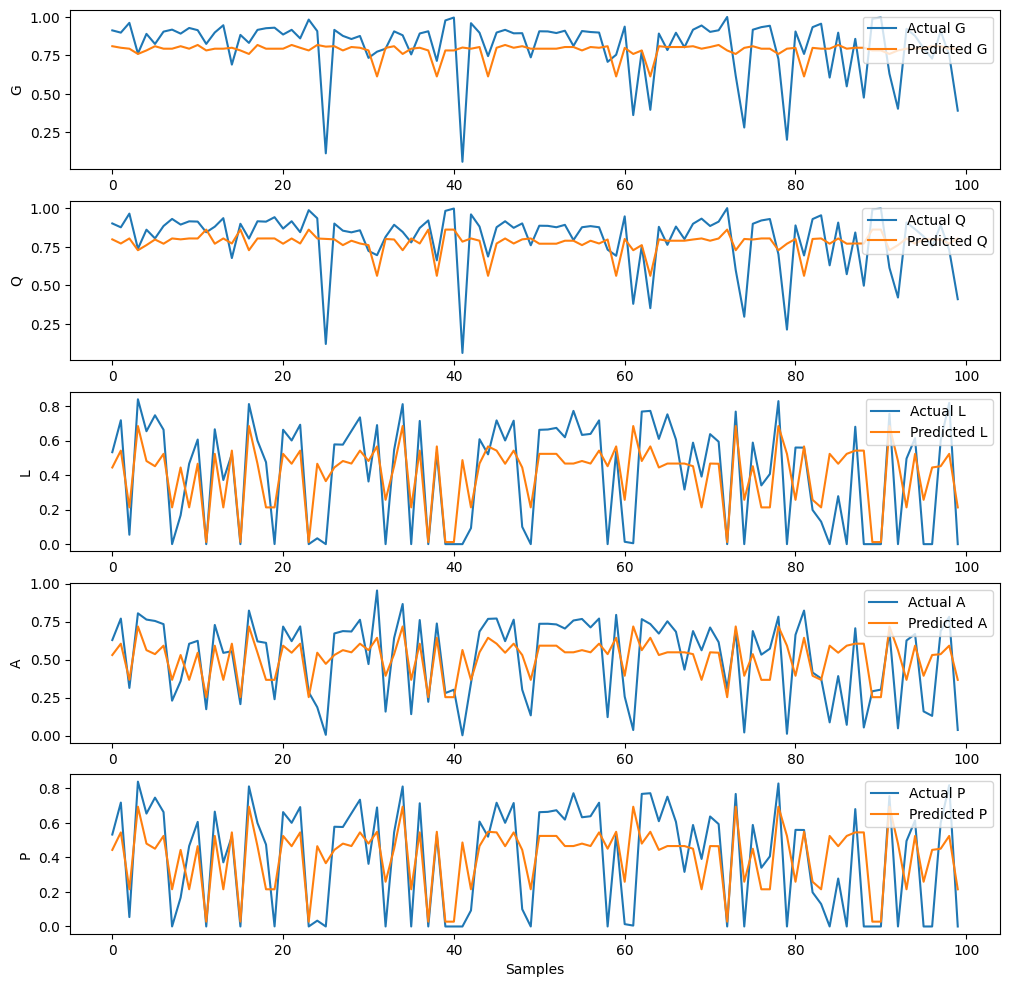

In [ ]:
plt.figure(figsize=(12, 12))
sample_range = 100
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()

## LSTM MODEL WITH MANUAL SPLITTING OF TRAIN AND TEST DATA

Epoch 1/300
152/152 [==============================] - 44s 211ms/step - loss: 2.5381 - val_loss: 1.8486 - lr: 0.0010
Epoch 2/300
152/152 [==============================] - 23s 150ms/step - loss: 1.3931 - val_loss: 1.0163 - lr: 0.0010
Epoch 3/300
152/152 [==============================] - 21s 141ms/step - loss: 0.7387 - val_loss: 0.5276 - lr: 0.0010
Epoch 4/300
152/152 [==============================] - 26s 174ms/step - loss: 0.3740 - val_loss: 0.2783 - lr: 0.0010
Epoch 5/300
152/152 [==============================] - 23s 153ms/step - loss: 0.1987 - val_loss: 0.1559 - lr: 0.0010
Epoch 6/300
152/152 [==============================] - 22s 145ms/step - loss: 0.1183 - val_loss: 0.1052 - lr: 0.0010
Epoch 7/300
152/152 [==============================] - 23s 151ms/step - loss: 0.0864 - val_loss: 0.0845 - lr: 0.0010
Epoch 8/300
152/152 [==============================] - 21s 138ms/step - loss: 0.0705 - val_loss: 0.0757 - lr: 0.0010
Epoch 9/300
152/152 [==============================] - 23s 152ms

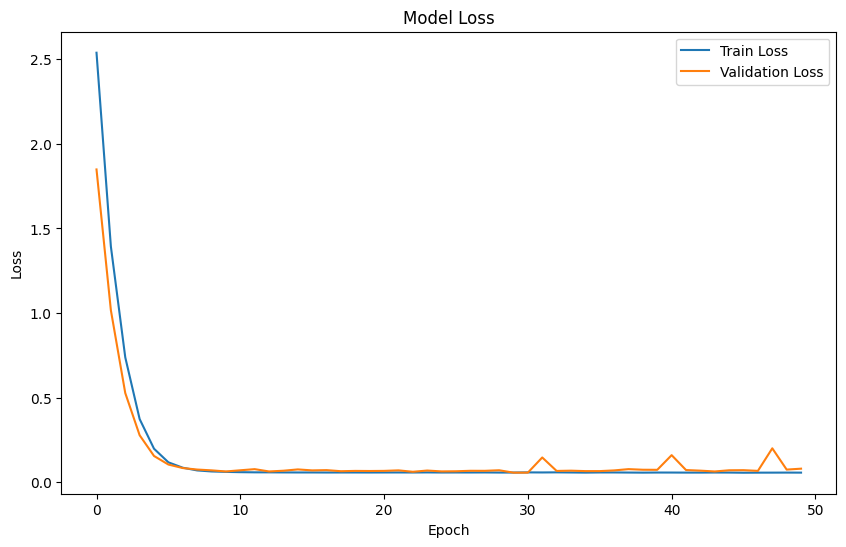

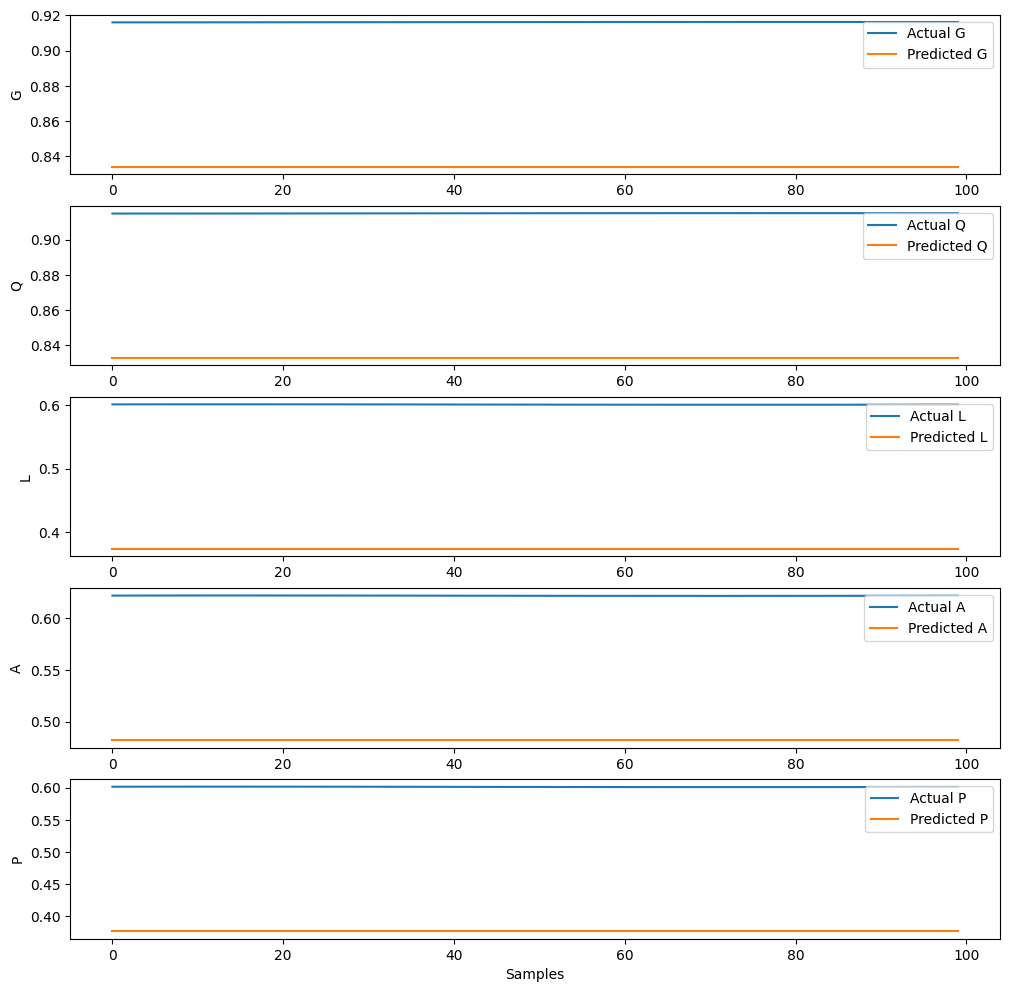

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['pH', 'T', 'DO', 'F']
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

X = data[input_cols].values
y = data[output_cols].values

# Create sequences
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X, y = create_sequences(X, y, time_steps)

# Manual Train-Test Split
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model
def create_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(256, activation='relu', return_sequences=True), input_shape=(time_steps, len(input_cols))))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Bidirectional(LSTM(128, activation='relu')))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu', kernel_regularizer='l2'))  # Regularized Dense Layer
    model.add(Dropout(0.3))  # Adjusted Dropout Rate
    model.add(Dense(64, activation='relu', kernel_regularizer='l2'))  # Regularized Dense Layer
    model.add(Dropout(0.3))  # Adjusted Dropout Rate
    model.add(Dense(len(output_cols)))
    model.compile(optimizer='adam', loss='mse')
    return model

model = create_model()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
test_predictions = model.predict(X_test)

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_lstm_no_time_improved_v2.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out

for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## New Craven Data Model

In [ ]:
import pandas as pd

# Load the new data
data_path = '/content/New_Craven_data.csv'  # Replace with the correct path
data = pd.read_csv(data_path)

# Display the first few rows to understand its structure
print(data.head())



   time  Time        pH          T        DO         F           G          Q  \
0     0   399  6.667677  38.413345  0.360832  0.020722  591.994218  47.855671   
1     1   400  6.667677  38.413345  0.360832  0.020722  592.096456  47.862021   
2     2   401  6.667677  38.413345  0.360832  0.020722  592.199668  47.868529   
3     3   402  6.667677  38.413345  0.360832  0.020722  592.303855  47.875193   
4     4   403  6.667677  38.413345  0.360832  0.020722  592.409016  47.882015   

            L         A          P  
0  102.053837  9.509482  51.026918  
1  102.055461  9.512052  51.027731  
2  102.052981  9.514394  51.026491  
3  102.046397  9.516510  51.023198  
4  102.035708  9.518398  51.017854  


In [ ]:
from sklearn.preprocessing import MinMaxScaler

input_cols = ['pH', 'T', 'DO', 'F']
output_cols = ['G', 'Q', 'L', 'A', 'P']

scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])


In [ ]:
import numpy as np

def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X = data[input_cols].values
y = data[output_cols].values
time_steps = 10
X, y = create_sequences(X, y, time_steps)


In [ ]:
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def create_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(256, activation='relu', return_sequences=True), input_shape=(time_steps, len(input_cols))))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Bidirectional(LSTM(128, activation='relu')))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(0.3))
    model.add(Dense(len(output_cols)))
    model.compile(optimizer='adam', loss='mse')
    return model

model = create_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])


Epoch 1/300
243/243 [==============================] - 59s 199ms/step - loss: 2.0425 - val_loss: 1.1168 - lr: 0.0010
Epoch 2/300
243/243 [==============================] - 37s 153ms/step - loss: 0.6424 - val_loss: 0.3291 - lr: 0.0010
Epoch 3/300
243/243 [==============================] - 50s 205ms/step - loss: 0.1690 - val_loss: 0.1034 - lr: 0.0010
Epoch 4/300
243/243 [==============================] - 40s 163ms/step - loss: 0.0495 - val_loss: 0.0558 - lr: 0.0010
Epoch 5/300
243/243 [==============================] - 35s 144ms/step - loss: 0.0225 - val_loss: 0.0479 - lr: 0.0010
Epoch 6/300
243/243 [==============================] - 58s 237ms/step - loss: 0.0159 - val_loss: 0.0422 - lr: 0.0010
Epoch 7/300
243/243 [==============================] - 41s 168ms/step - loss: 0.0140 - val_loss: 0.0468 - lr: 0.0010
Epoch 8/300
243/243 [==============================] - 35s 145ms/step - loss: 0.0133 - val_loss: 0.0503 - lr: 0.0010
Epoch 9/300
243/243 [==============================] - 38s 155ms

30/30 [==============================] - 2s 81ms/step
Mean Squared Error: 0.005267091921077968
Mean Absolute Error: 0.053671779163311874
R² Score: 0.7207967953252021


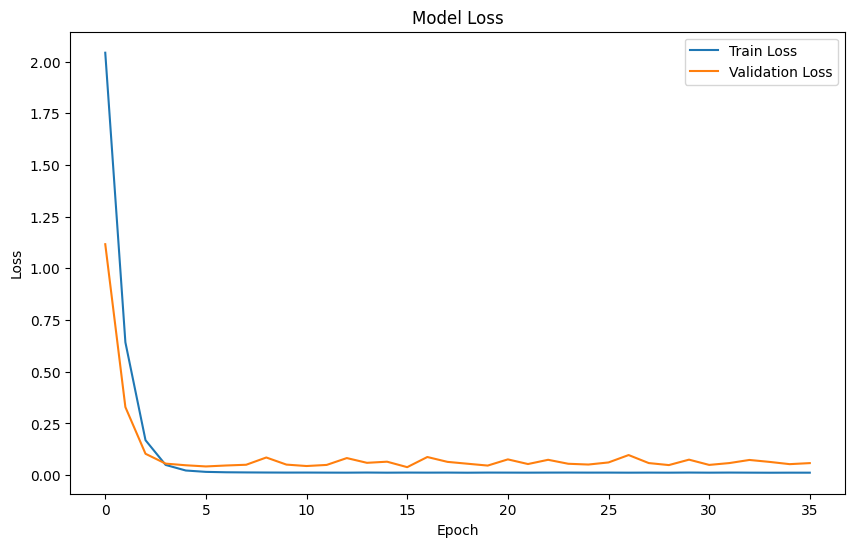

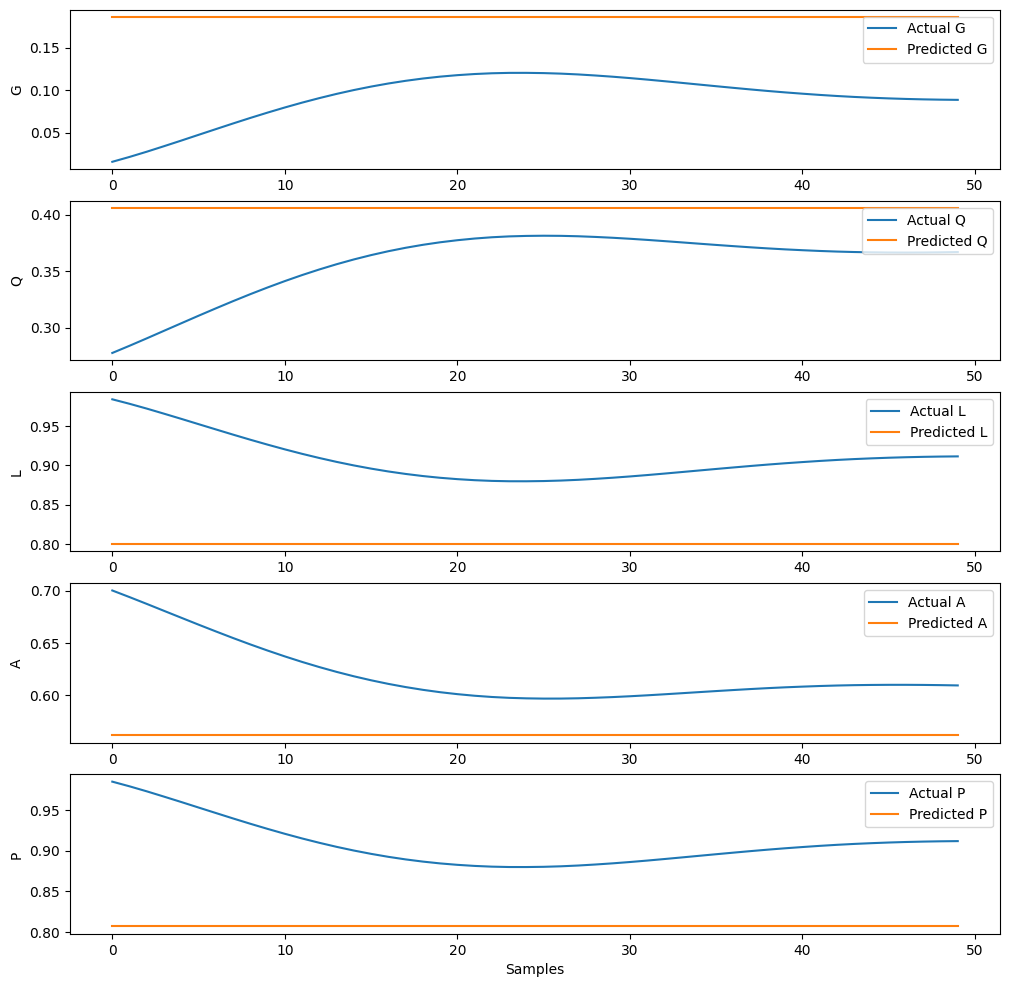

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test_predictions = model.predict(X_test)

comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_lstm_new_data.csv', index=False)

mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values
plt.figure(figsize=(12, 12))
sample_range = 50

for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Without Normalization

Epoch 1/300
243/243 [==============================] - 47s 150ms/step - loss: 21701.7324 - val_loss: 12739.1621 - lr: 0.0010
Epoch 2/300
243/243 [==============================] - 38s 158ms/step - loss: 3388.7124 - val_loss: 1532.6493 - lr: 0.0010
Epoch 3/300
243/243 [==============================] - 39s 159ms/step - loss: 2669.4336 - val_loss: 1265.4974 - lr: 0.0010
Epoch 4/300
243/243 [==============================] - 38s 155ms/step - loss: 2401.2705 - val_loss: 1081.3798 - lr: 0.0010
Epoch 5/300
243/243 [==============================] - 36s 147ms/step - loss: 2353.3523 - val_loss: 526.4594 - lr: 0.0010
Epoch 6/300
243/243 [==============================] - 37s 154ms/step - loss: 2260.2859 - val_loss: 960.1940 - lr: 0.0010
Epoch 7/300
243/243 [==============================] - 37s 153ms/step - loss: 2169.6931 - val_loss: 1352.5219 - lr: 0.0010
Epoch 8/300
243/243 [==============================] - 37s 151ms/step - loss: 2076.9465 - val_loss: 5231.5220 - lr: 0.0010
Epoch 9/300
243/

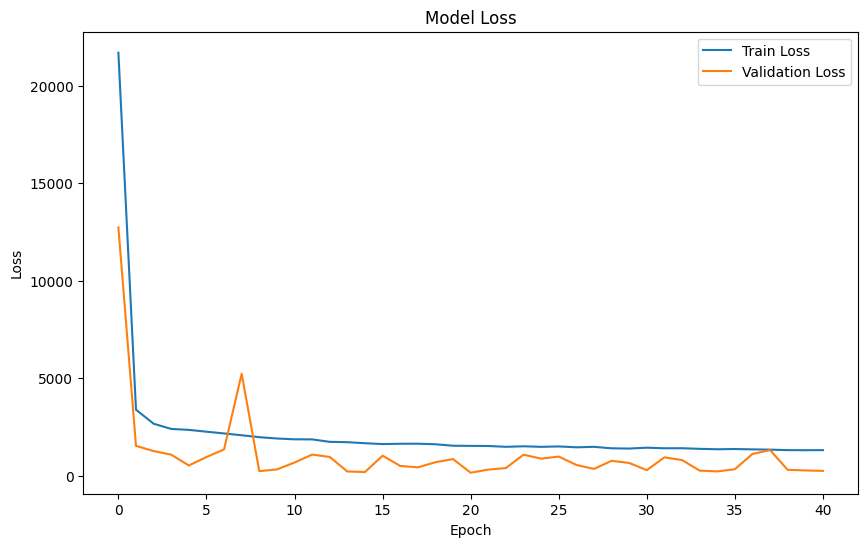

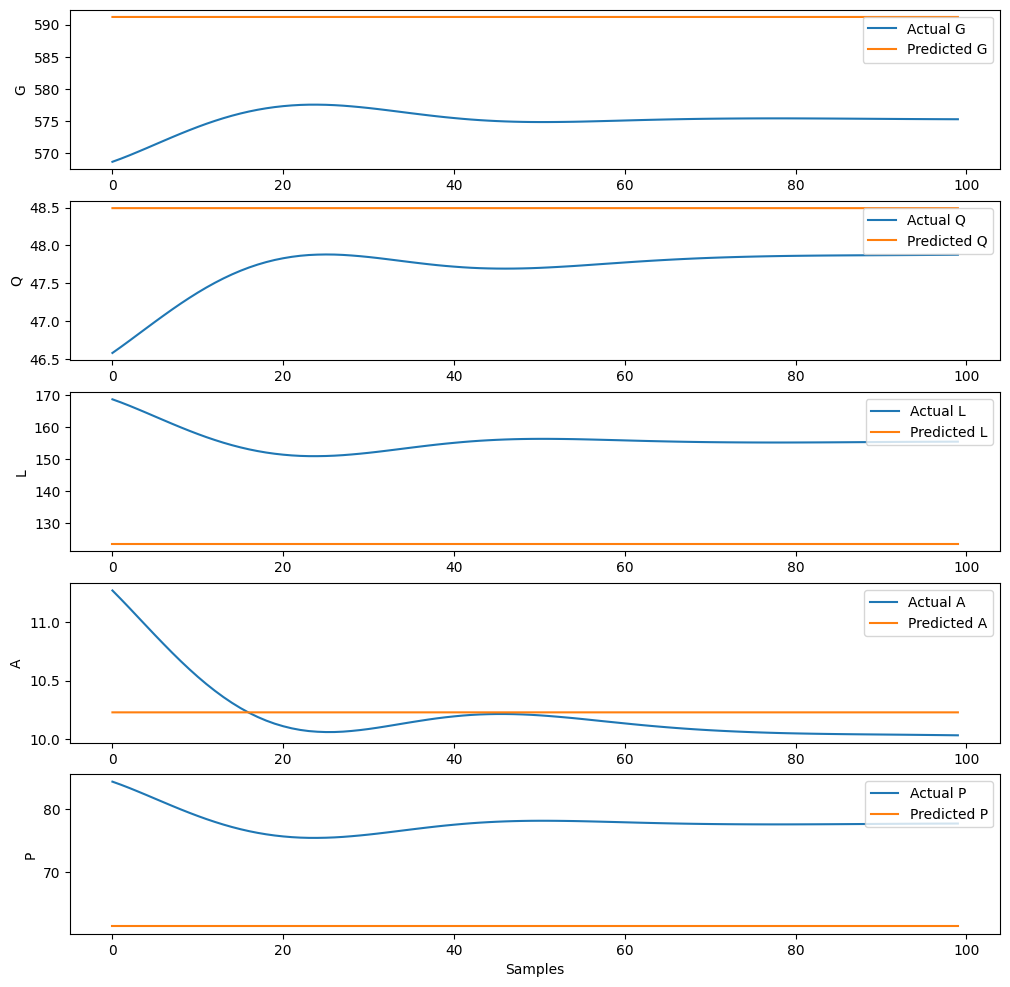

In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the new data
data_path = '/content/New_Craven_data.csv'  # Replace with the correct path
data = pd.read_csv(data_path)

# Create sequences
input_cols = ['pH', 'T', 'DO', 'F']
output_cols = ['G', 'Q', 'L', 'A', 'P']
X = data[input_cols].values
y = data[output_cols].values

def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X, y = create_sequences(X, y, time_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(256, activation='relu', return_sequences=True), input_shape=(time_steps, len(input_cols))))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))  # Regularized Dense Layer
model.add(Dropout(0.3))  # Adjusted Dropout Rate
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))  # Regularized Dense Layer
model.add(Dropout(0.3))  # Adjusted Dropout Rate
model.add(Dense(len(output_cols)))
model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
test_predictions = model.predict(X_test)

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_lstm_no_norm.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out

for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Another New Data LSTM Model - 12/06/2024


X_train shape: (7672, 10, 4), X_test shape: (1919, 10, 4)
y_train shape: (7672, 5), y_test shape: (1919, 5)
Epoch 1/100
192/192 [==============================] - 4s 14ms/step - loss: 0.0429 - val_loss: 0.0070
Epoch 2/100
192/192 [==============================] - 2s 9ms/step - loss: 0.0075 - val_loss: 0.0060
Epoch 3/100
192/192 [==============================] - 1s 7ms/step - loss: 0.0070 - val_loss: 0.0059
Epoch 4/100
192/192 [==============================] - 1s 7ms/step - loss: 0.0069 - val_loss: 0.0059
Epoch 5/100
192/192 [==============================] - 1s 7ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 6/100
192/192 [==============================] - 1s 7ms/step - loss: 0.0067 - val_loss: 0.0056
Epoch 7/100
192/192 [==============================] - 1s 7ms/step - loss: 0.0066 - val_loss: 0.0056
Epoch 8/100
192/192 [==============================] - 1s 7ms/step - loss: 0.0066 - val_loss: 0.0056
Epoch 9/100
192/192 [==============================] - 1s 7ms/step - loss: 0.0066 -

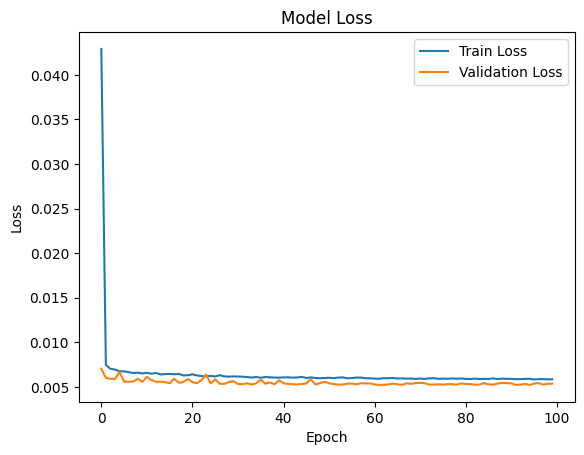

60/60 [==============================] - 0s 3ms/step
MSE: 57.895406728218006
MAE: 3.5704798813803675
RMSE: 7.608903122541252
Adjusted R²: 0.887935170918105


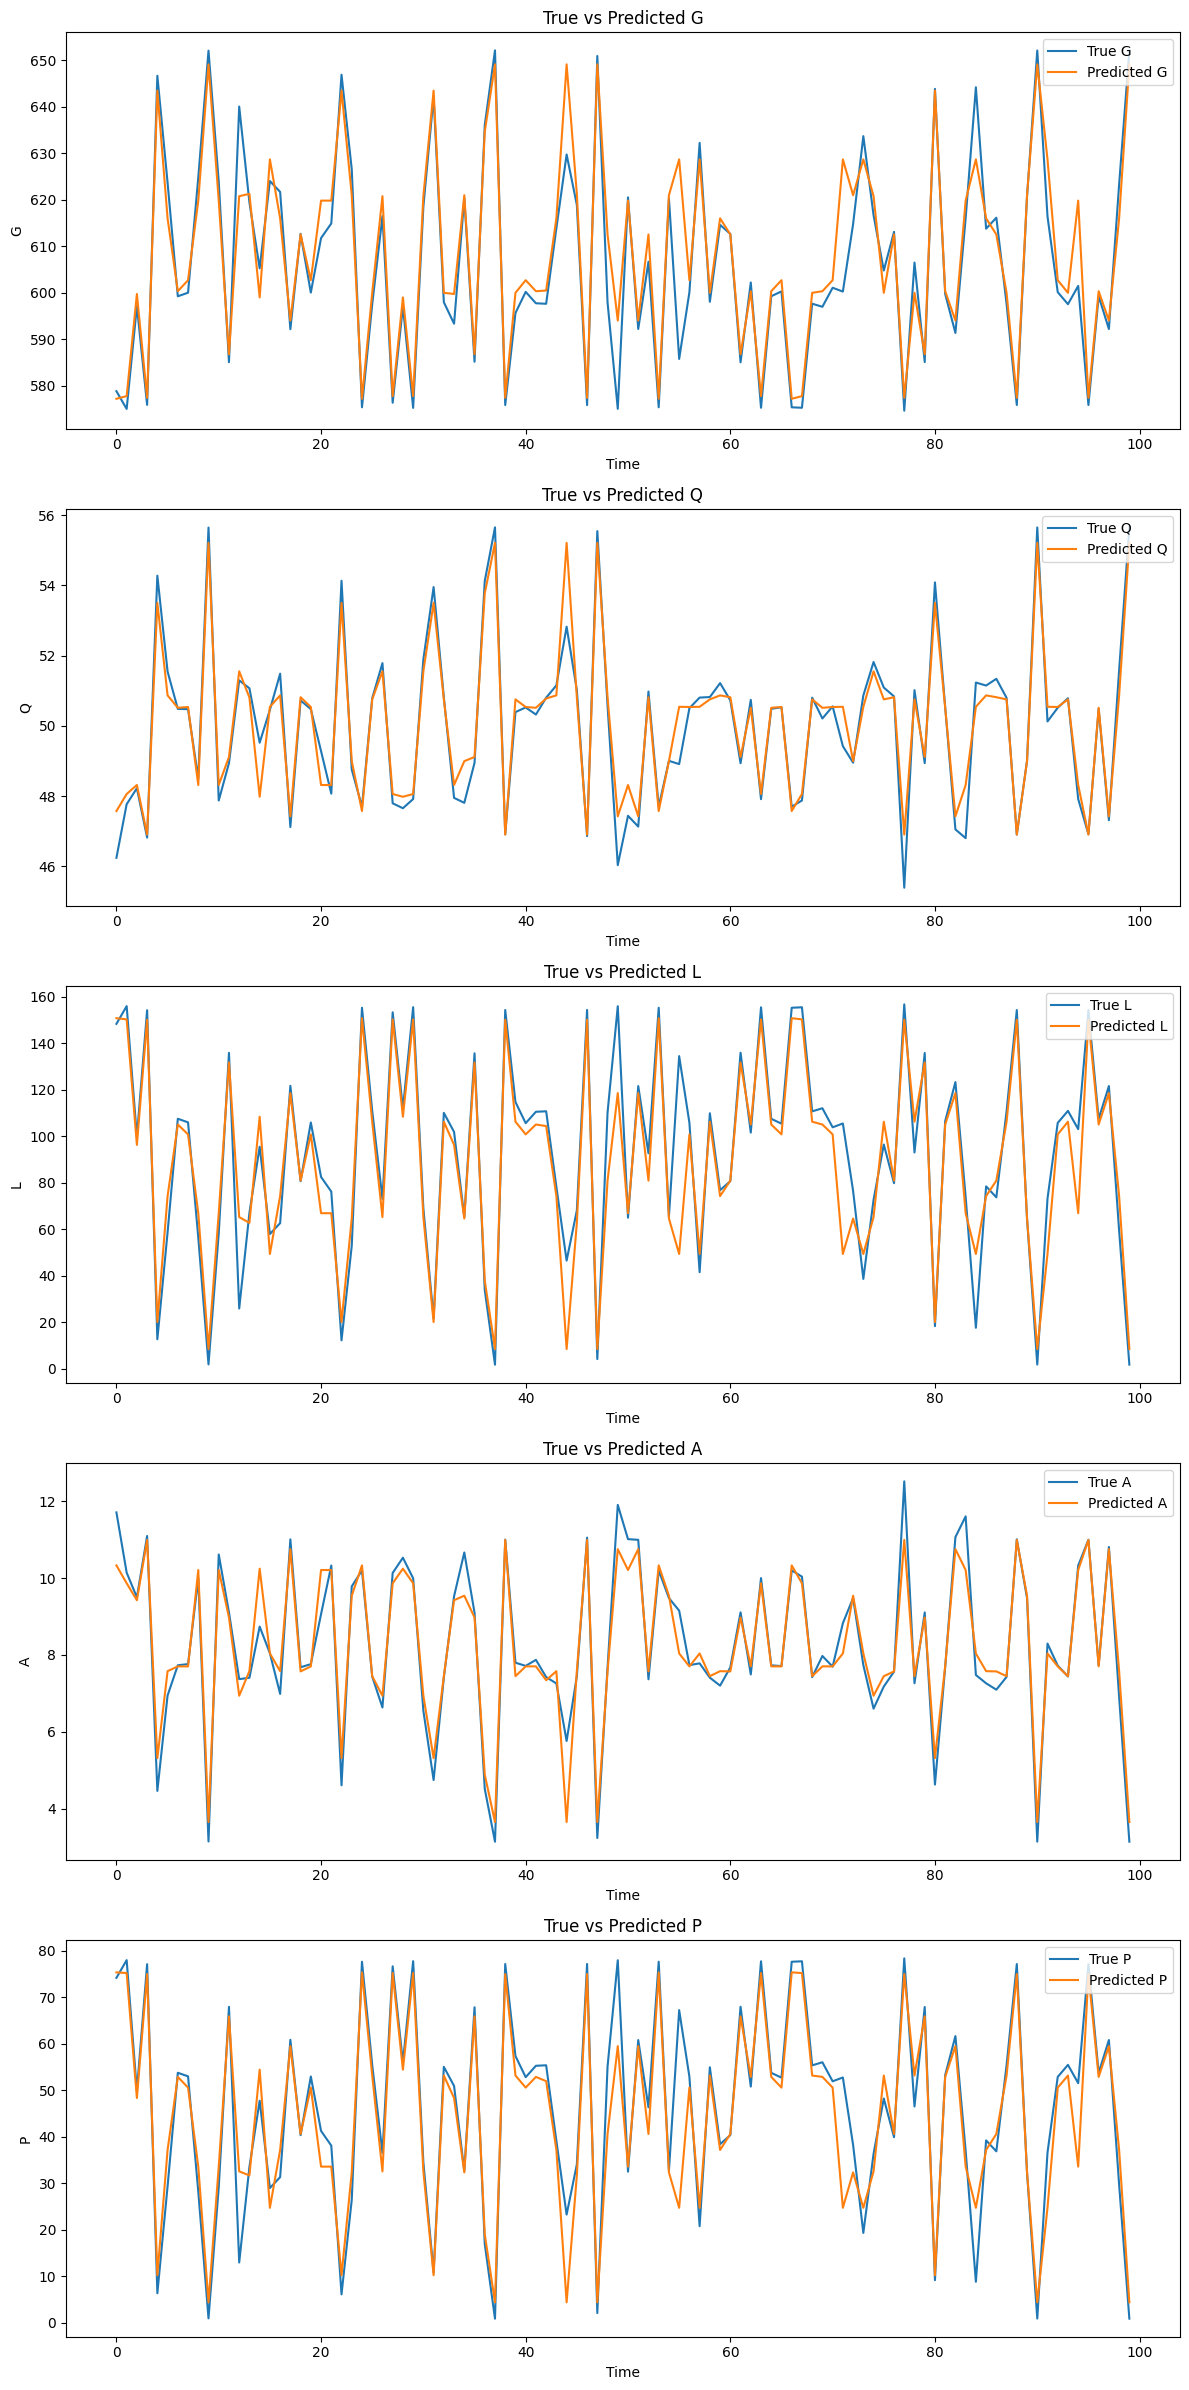

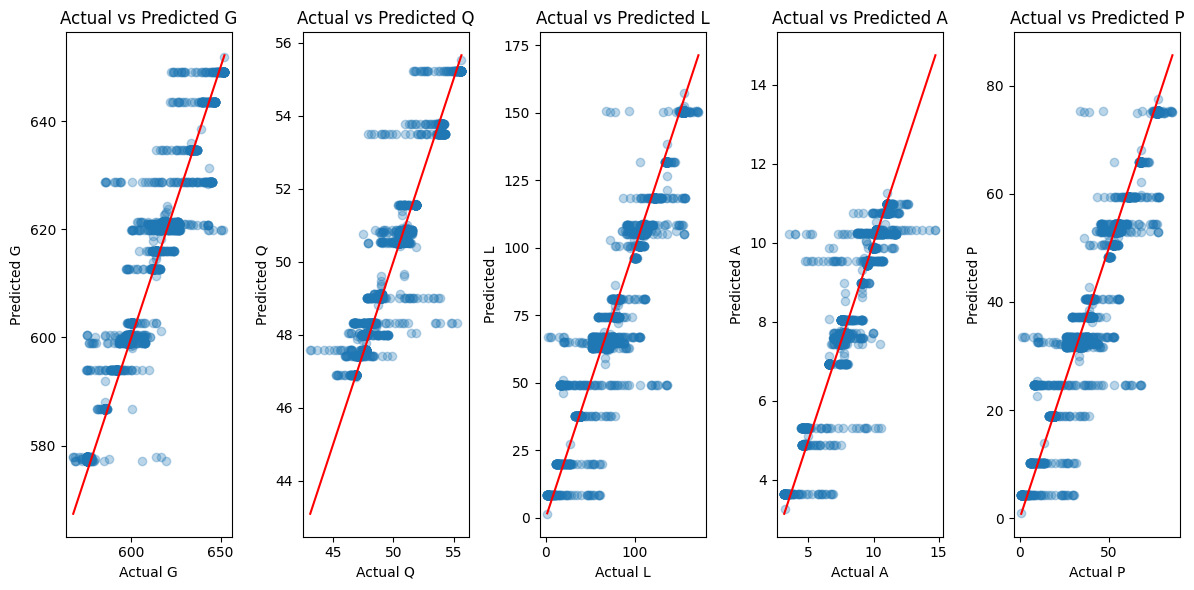

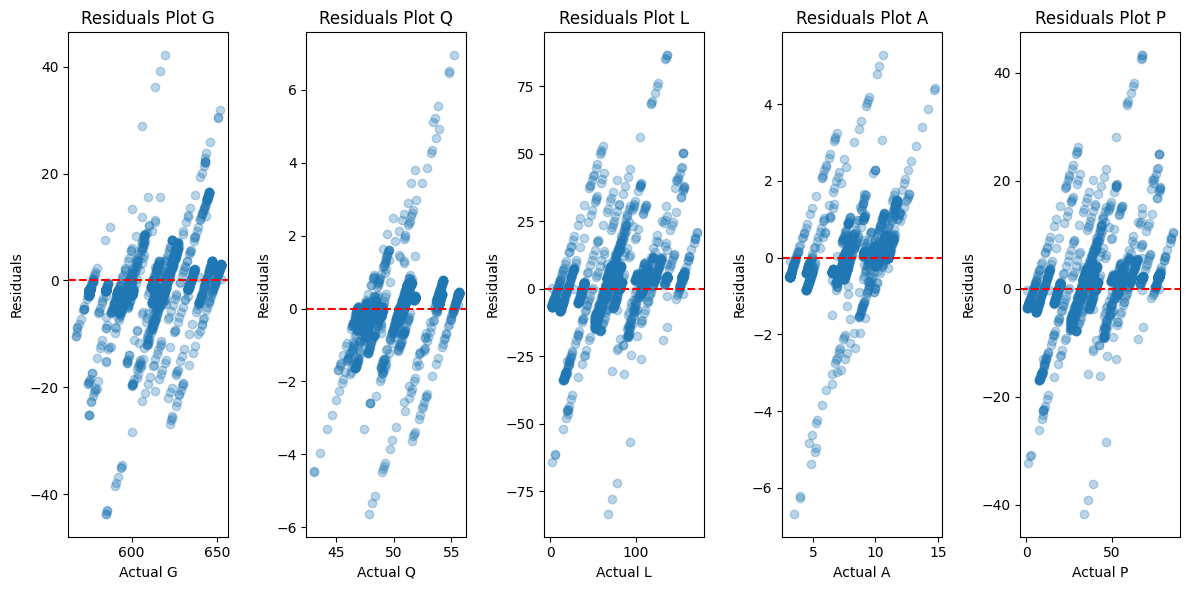

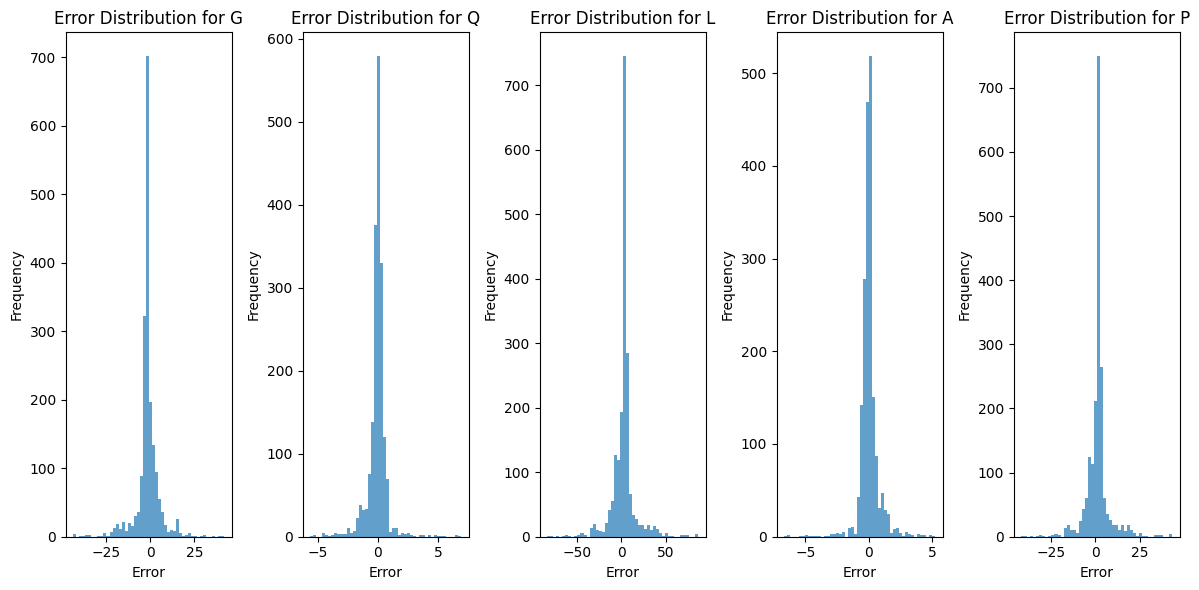

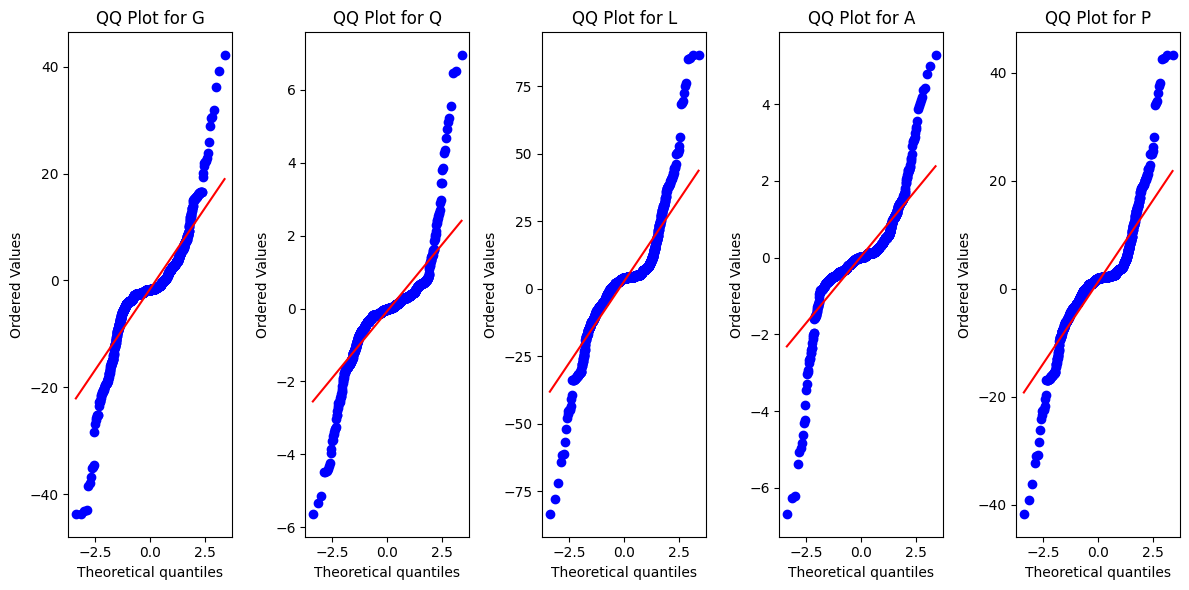

MAPE: 11.431192095699192


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the dataset
file_path = 'New Craven data.csv'  # Ensure the path is correct
data = pd.read_csv(file_path)

# Extract input and output columns
input_columns = ['pH', 'T', 'DO', 'F']
output_columns = ['G', 'Q', 'L', 'A', 'P']

# Extracting input and output data
inputs = data[input_columns].values
outputs = data[output_columns].values

# Scaling the data
scaler_inputs = MinMaxScaler()
scaler_outputs = MinMaxScaler()

scaled_inputs = scaler_inputs.fit_transform(inputs)
scaled_outputs = scaler_outputs.fit_transform(outputs)

# Prepare sequences for LSTM
def create_sequences(inputs, outputs, sequence_length):
    x = []
    y = []
    for i in range(len(inputs) - sequence_length):
        x.append(inputs[i:i+sequence_length])
        y.append(outputs[i+sequence_length])
    return np.array(x), np.array(y)

sequence_length = 10
X, y = create_sequences(scaled_inputs, scaled_outputs, sequence_length)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, len(input_columns))))
model.add(Dense(len(output_columns)))

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

model.save('lstm_model.h5')
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict on the test set
y_pred = model.predict(X_test)

# Inverse scaling
y_test_inv = scaler_outputs.inverse_transform(y_test)
y_pred_inv = scaler_outputs.inverse_transform(y_pred)

# Compute MSE, MAE, RMSE, and Adjusted R²
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
n = y_test_inv.shape[0]
p = y_test_inv.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'Adjusted R²: {adj_r2}')

# Save Predictions and Actual Values to CSV
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test_inv[:, i] for i, col in enumerate(output_columns)})
for i, col in enumerate(output_columns):
    comparison_df['Predicted_' + col] = y_pred_inv[:, i]

comparison_df.to_csv('comparison_lstm_predictions_v3.csv', index=False)

# Plotting true vs predicted values for all outputs
plt.figure(figsize=(12, 24))
sample_range = 100  # Adjust this range to zoom in/out

for i, col in enumerate(output_columns):
    plt.subplot(len(output_columns), 1, i+1)
    plt.plot(y_test_inv[:sample_range, i], label=f'True {col}')
    plt.plot(y_pred_inv[:sample_range, i], label=f'Predicted {col}')
    plt.title(f'True vs Predicted {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Additional Visualizations
# Distribution of Actual vs Predicted Values
plt.figure(figsize=(12, 6))
for i, col in enumerate(output_columns):
    plt.subplot(1, len(output_columns), i+1)
    plt.scatter(y_test_inv[:, i], y_pred_inv[:, i], alpha=0.3)
    plt.plot([min(y_test_inv[:, i]), max(y_test_inv[:, i])], [min(y_test_inv[:, i]), max(y_test_inv[:, i])], 'r')
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
plt.tight_layout()
plt.show()

# Residuals Plot
plt.figure(figsize=(12, 6))
for i, col in enumerate(output_columns):
    plt.subplot(1, len(output_columns), i+1)
    residuals = y_test_inv[:, i] - y_pred_inv[:, i]
    plt.scatter(y_test_inv[:, i], residuals, alpha=0.3)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel(f'Actual {col}')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot {col}')
plt.tight_layout()
plt.show()

# Error Distribution
plt.figure(figsize=(12, 6))
for i, col in enumerate(output_columns):
    plt.subplot(1, len(output_columns), i+1)
    residuals = y_test_inv[:, i] - y_pred_inv[:, i]
    plt.hist(residuals, bins=50, alpha=0.7)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.title(f'Error Distribution for {col}')
plt.tight_layout()
plt.show()

# QQ Plot
import scipy.stats as stats

plt.figure(figsize=(12, 6))
for i, col in enumerate(output_columns):
    plt.subplot(1, len(output_columns), i+1)
    residuals = y_test_inv[:, i] - y_pred_inv[:, i]
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'QQ Plot for {col}')
plt.tight_layout()
plt.show()

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print(f'MAPE: {mape}')


### Cross validation techniques implemented

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

def create_model(input_shape, output_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(output_shape))
    model.compile(optimizer='adam', loss='mse')
    return model

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Lists to store metrics
mse_scores = []
mae_scores = []
r2_scores = []
adj_r2_scores = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train the model
    model = create_model((sequence_length, len(input_columns)), len(output_columns))
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

    # Make predictions
    y_pred = model.predict(X_test)

    # Inverse scaling
    y_test_inv = scaler_outputs.inverse_transform(y_test)
    y_pred_inv = scaler_outputs.inverse_transform(y_pred)

    # Compute metrics
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    r2 = r2_score(y_test_inv, y_pred_inv)
    n = y_test_inv.shape[0]
    p = y_test_inv.shape[1]
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    # Append metrics to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)

# Print the average of each metric
print(f'Average MSE: {np.mean(mse_scores)}')
print(f'Average MAE: {np.mean(mae_scores)}')
print(f'Average R²: {np.mean(r2_scores)}')
print(f'Average Adjusted R²: {np.mean(adj_r2_scores)}')


Epoch 1/50
51/51 [==============================] - 5s 13ms/step - loss: 0.1246
Epoch 2/50
51/51 [==============================] - 1s 13ms/step - loss: 0.0130
Epoch 3/50
51/51 [==============================] - 1s 11ms/step - loss: 0.0110
Epoch 4/50
51/51 [==============================] - 1s 15ms/step - loss: 0.0108
Epoch 5/50
51/51 [==============================] - 1s 10ms/step - loss: 0.0100
Epoch 6/50
51/51 [==============================] - 1s 11ms/step - loss: 0.0097
Epoch 7/50
51/51 [==============================] - 1s 15ms/step - loss: 0.0097
Epoch 8/50
51/51 [==============================] - 1s 13ms/step - loss: 0.0095
Epoch 9/50
51/51 [==============================] - 1s 11ms/step - loss: 0.0095
Epoch 10/50
51/51 [==============================] - 1s 14ms/step - loss: 0.0093
Epoch 11/50
51/51 [==============================] - 1s 14ms/step - loss: 0.0094
Epoch 12/50
51/51 [==============================] - 1s 11ms/step - loss: 0.0097
Epoch 13/50
51/51 [==================

# Analysis of the Model's Performance - 12/06/2024


## Metrics Summary:
### Final MSE: 56.01685356514971
### Final MAE: 3.4359545909283824
### Final RMSE: 7.484440765023778
### Final Adjusted R²: 0.889920709537846
### MAPE: 13.993183251036545

## Visual Analysis:
### Actual vs Predicted Scatter Plots:
The scatter plots for G, Q, L, A, and P show a reasonable alignment of the predicted values with the actual values. The red line represents the perfect prediction line (where predicted values equal actual values). The points are relatively close to this line, indicating good predictive performance, though there are some deviations.

### Residuals Plot:
The residuals plots indicate the difference between actual and predicted values. Ideally, residuals should be randomly distributed around zero with no apparent pattern. In the provided plots:There are clusters of residuals that suggest the model might be underpredicting or overpredicting in certain ranges.
There are some outliers, particularly noticeable in the G and L residuals plots, indicating occasional significant prediction errors.

### Error Distribution:
The error distribution histograms show that most of the errors are centered around zero, which is a good sign. However, the long tails in the distribution indicate some larger errors, consistent with what was seen in the residuals plots.

### QQ Plots:
The QQ plots compare the distribution of residuals to a normal distribution. Deviations from the red line (the line of perfect normality) indicate non-normality in the residuals. The plots show that residuals for all outputs deviate from normality, particularly in the tails, suggesting that the model's errors are not perfectly normally distributed.

### True vs Predicted Time Series Plots:
These plots show how the actual and predicted values change over time. The predicted values generally follow the trends of the actual values, but there are some noticeable mismatches. This suggests that while the model captures the overall patterns, it struggles with some of the more volatile changes.

Epoch 1/50
51/51 [==============================] - 2s 8ms/step - loss: 0.0695
Epoch 2/50
51/51 [==============================] - 0s 8ms/step - loss: 0.0116
Epoch 3/50
51/51 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 4/50
51/51 [==============================] - 0s 8ms/step - loss: 0.0102
Epoch 5/50
51/51 [==============================] - 0s 8ms/step - loss: 0.0098
Epoch 6/50
51/51 [==============================] - 0s 8ms/step - loss: 0.0097
Epoch 7/50
51/51 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 8/50
51/51 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 9/50
51/51 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 10/50
51/51 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 11/50
51/51 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 12/50
51/51 [==============================] - 0s 7ms/step - loss: 0.0094
Epoch 13/50
51/51 [==============================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


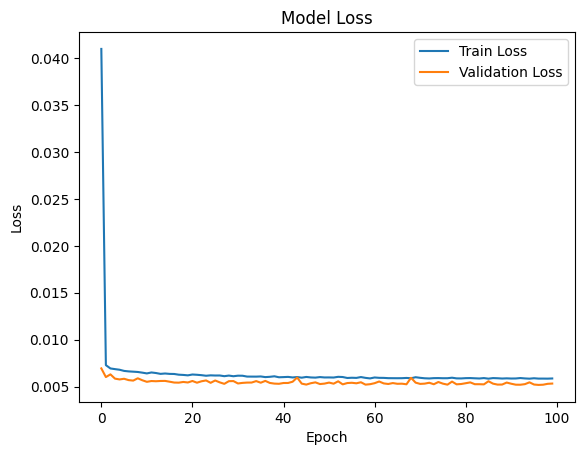

60/60 [==============================] - 0s 3ms/step
Final MSE: 56.01685356514971
Final MAE: 3.4359545909283824
Final RMSE: 7.484440765023778
Final Adjusted R²: 0.889920709537846


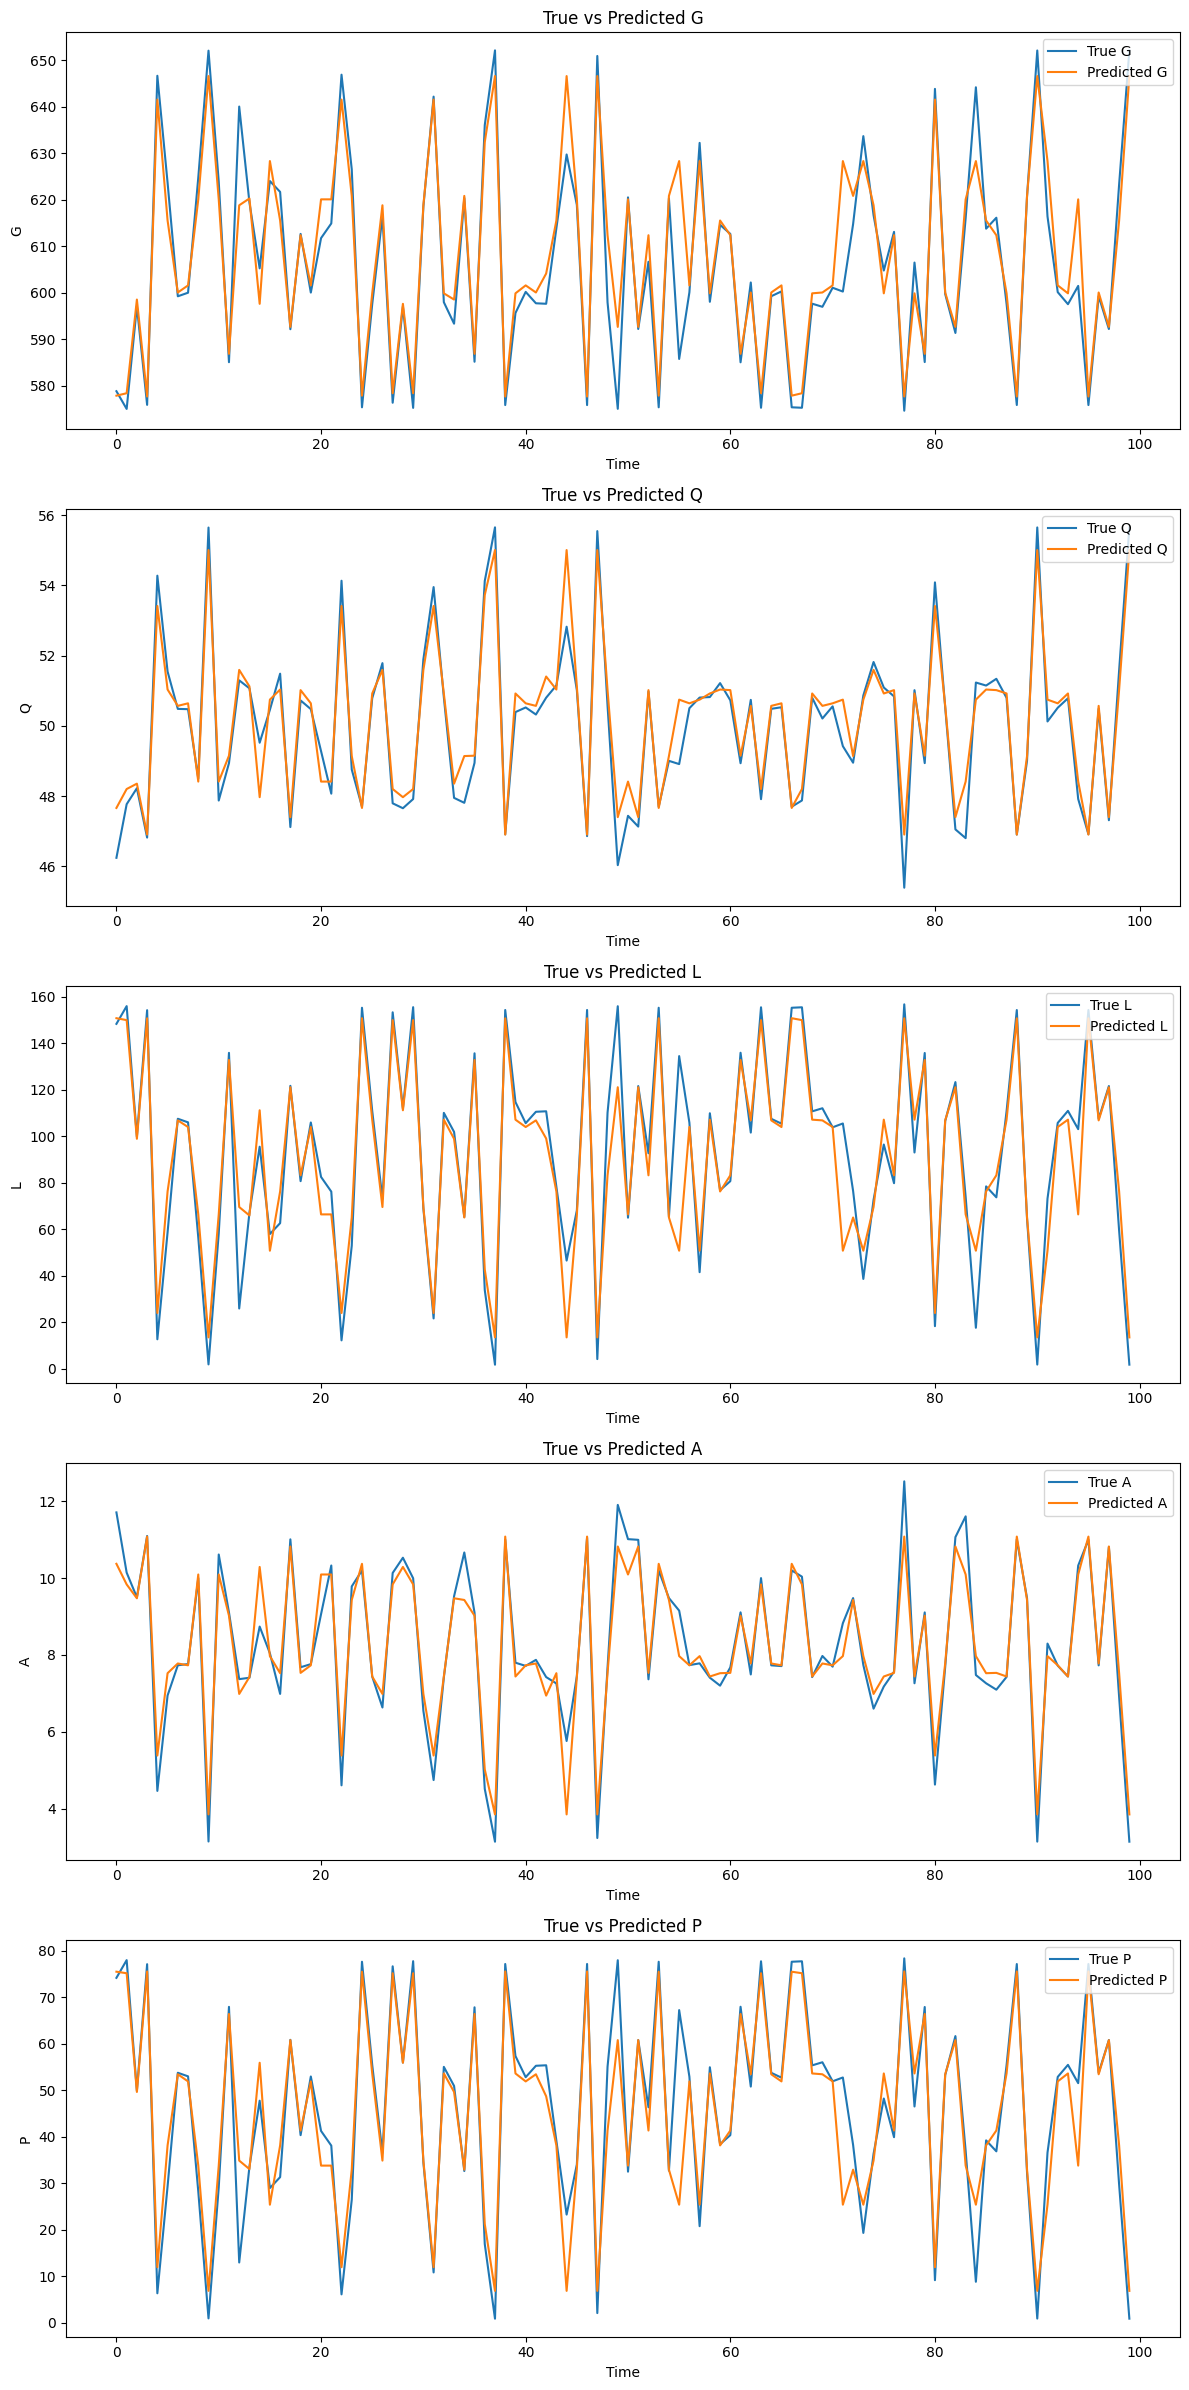

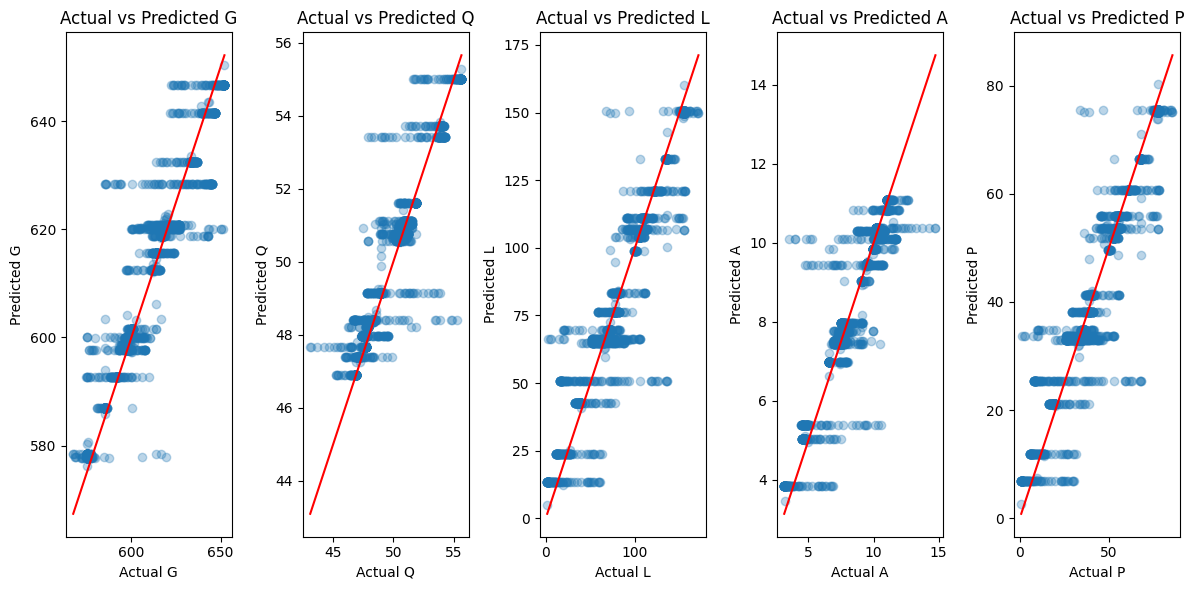

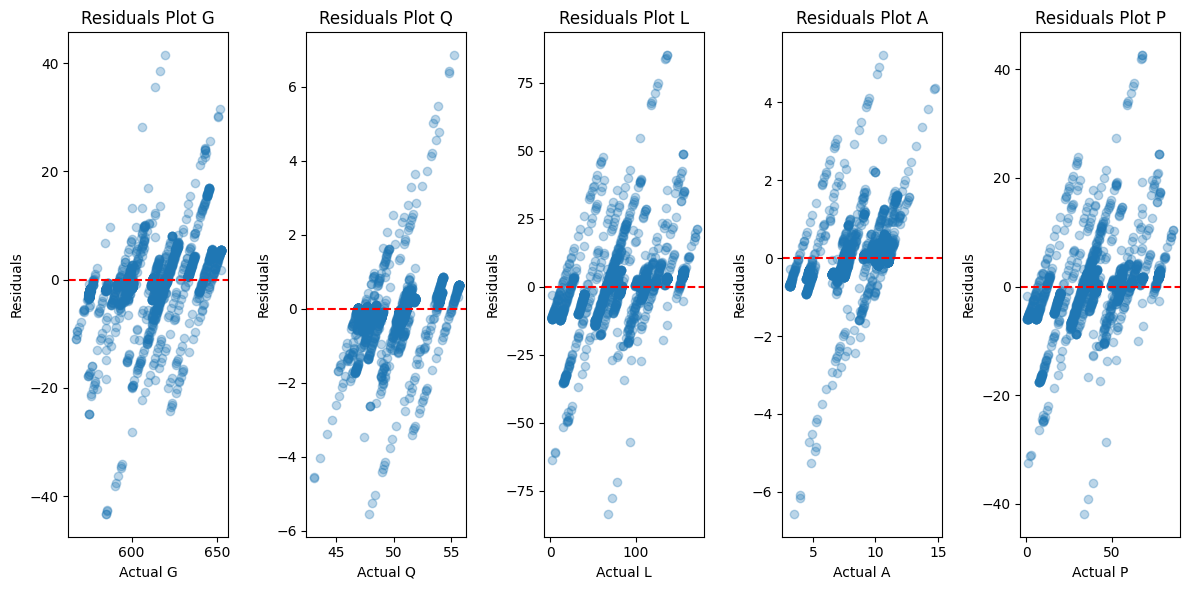

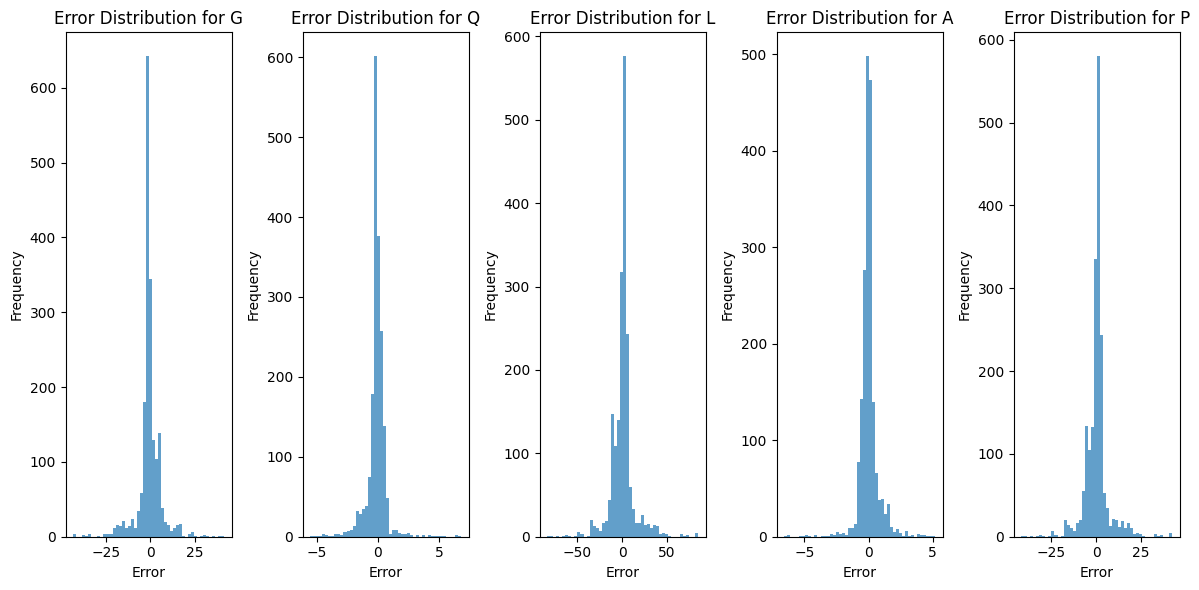

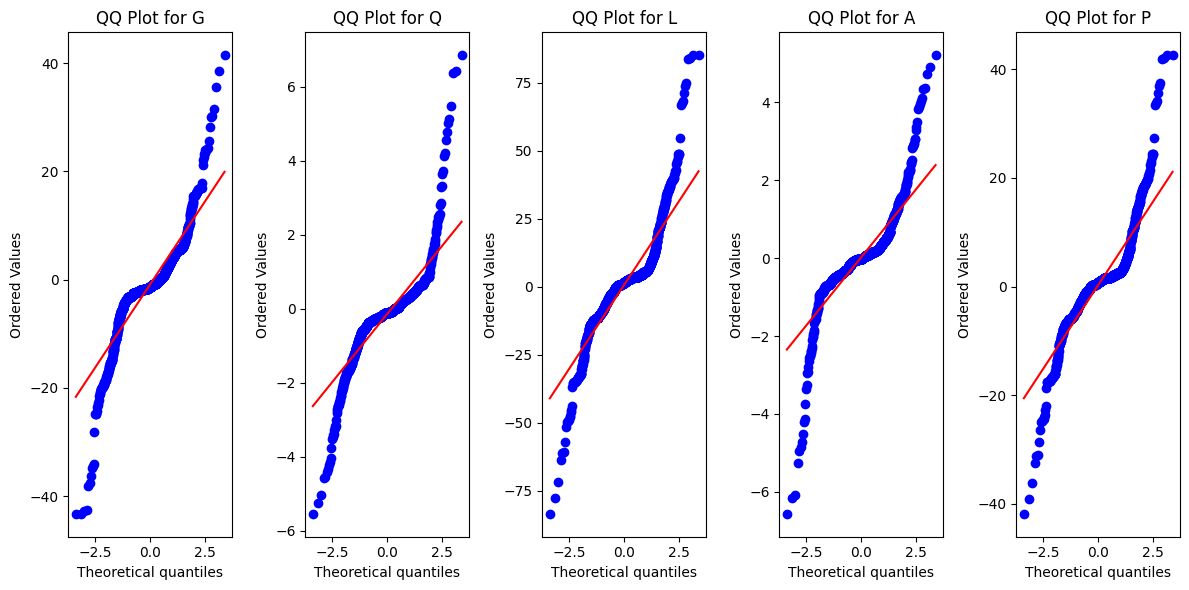

MAPE: 13.993183251036545


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'New Craven data.csv'  # Ensure the path is correct
data = pd.read_csv(file_path)

# Extract input and output columns
input_columns = ['pH', 'T', 'DO', 'F']
output_columns = ['G', 'Q', 'L', 'A', 'P']

# Extracting input and output data
inputs = data[input_columns].values
outputs = data[output_columns].values

# Scaling the data
scaler_inputs = MinMaxScaler()
scaler_outputs = MinMaxScaler()

scaled_inputs = scaler_inputs.fit_transform(inputs)
scaled_outputs = scaler_outputs.fit_transform(outputs)

# Prepare sequences for LSTM
def create_sequences(inputs, outputs, sequence_length):
    x = []
    y = []
    for i in range(len(inputs) - sequence_length):
        x.append(inputs[i:i+sequence_length])
        y.append(outputs[i+sequence_length])
    return np.array(x), np.array(y)

sequence_length = 10
X, y = create_sequences(scaled_inputs, scaled_outputs, sequence_length)

# Define a function to create and compile the model
def create_model(input_shape, output_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(output_shape))
    model.compile(optimizer='adam', loss='mse')
    return model

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Lists to store metrics
mse_scores = []
mae_scores = []
r2_scores = []
adj_r2_scores = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train the model
    model = create_model((sequence_length, len(input_columns)), len(output_columns))
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

    # Make predictions
    y_pred = model.predict(X_test)

    # Inverse scaling
    y_test_inv = scaler_outputs.inverse_transform(y_test)
    y_pred_inv = scaler_outputs.inverse_transform(y_pred)

    # Compute metrics
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    r2 = r2_score(y_test_inv, y_pred_inv)
    n = y_test_inv.shape[0]
    p = y_test_inv.shape[1]
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    # Append metrics to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)

# Print the average of each metric
print(f'Average MSE: {np.mean(mse_scores)}')
print(f'Average MAE: {np.mean(mae_scores)}')
print(f'Average R²: {np.mean(r2_scores)}')
print(f'Average Adjusted R²: {np.mean(adj_r2_scores)}')

# Final model training on entire dataset for further analysis and visualization

# Split the data into training and testing sets (final split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the final model
model = create_model((sequence_length, len(input_columns)), len(output_columns))
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
model.save('lstm_model.h5')

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict on the test set
y_pred = model.predict(X_test)

# Inverse scaling
y_test_inv = scaler_outputs.inverse_transform(y_test)
y_pred_inv = scaler_outputs.inverse_transform(y_pred)

# Compute final metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
n = y_test_inv.shape[0]
p = y_test_inv.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f'Final MSE: {mse}')
print(f'Final MAE: {mae}')
print(f'Final RMSE: {rmse}')
print(f'Final Adjusted R²: {adj_r2}')

# Save Predictions and Actual Values to CSV
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test_inv[:, i] for i, col in enumerate(output_columns)})
for i, col in enumerate(output_columns):
    comparison_df['Predicted_' + col] = y_pred_inv[:, i]

comparison_df.to_csv('comparison_lstm_predictions_v4.csv', index=False)

# Plotting true vs predicted values for all outputs
plt.figure(figsize=(12, 24))
sample_range = 100  # Adjust this range to zoom in/out

for i, col in enumerate(output_columns):
    plt.subplot(len(output_columns), 1, i+1)
    plt.plot(y_test_inv[:sample_range, i], label=f'True {col}')
    plt.plot(y_pred_inv[:sample_range, i], label=f'Predicted {col}')
    plt.title(f'True vs Predicted {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Additional Visualizations
# Distribution of Actual vs Predicted Values
plt.figure(figsize=(12, 6))
for i, col in enumerate(output_columns):
    plt.subplot(1, len(output_columns), i+1)
    plt.scatter(y_test_inv[:, i], y_pred_inv[:, i], alpha=0.3)
    plt.plot([min(y_test_inv[:, i]), max(y_test_inv[:, i])], [min(y_test_inv[:, i]), max(y_test_inv[:, i])], 'r')
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
plt.tight_layout()
plt.show()

# Residuals Plot
plt.figure(figsize=(12, 6))
for i, col in enumerate(output_columns):
    plt.subplot(1, len(output_columns), i+1)
    residuals = y_test_inv[:, i] - y_pred_inv[:, i]
    plt.scatter(y_test_inv[:, i], residuals, alpha=0.3)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel(f'Actual {col}')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot {col}')
plt.tight_layout()
plt.show()

# Error Distribution
plt.figure(figsize=(12, 6))
for i, col in enumerate(output_columns):
    plt.subplot(1, len(output_columns), i+1)
    residuals = y_test_inv[:, i] - y_pred_inv[:, i]
    plt.hist(residuals, bins=50, alpha=0.7)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.title(f'Error Distribution for {col}')
plt.tight_layout()
plt.show()

# QQ Plot
import scipy.stats as stats

plt.figure(figsize=(12, 6))
for i, col in enumerate(output_columns):
    plt.subplot(1, len(output_columns), i+1)
    residuals = y_test_inv[:, i] - y_pred_inv[:, i]
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'QQ Plot for {col}')
plt.tight_layout()
plt.show()

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print(f'MAPE: {mape}')


#Using all inputs - RANDOM FOREST MODEL - BEST MODEL YET

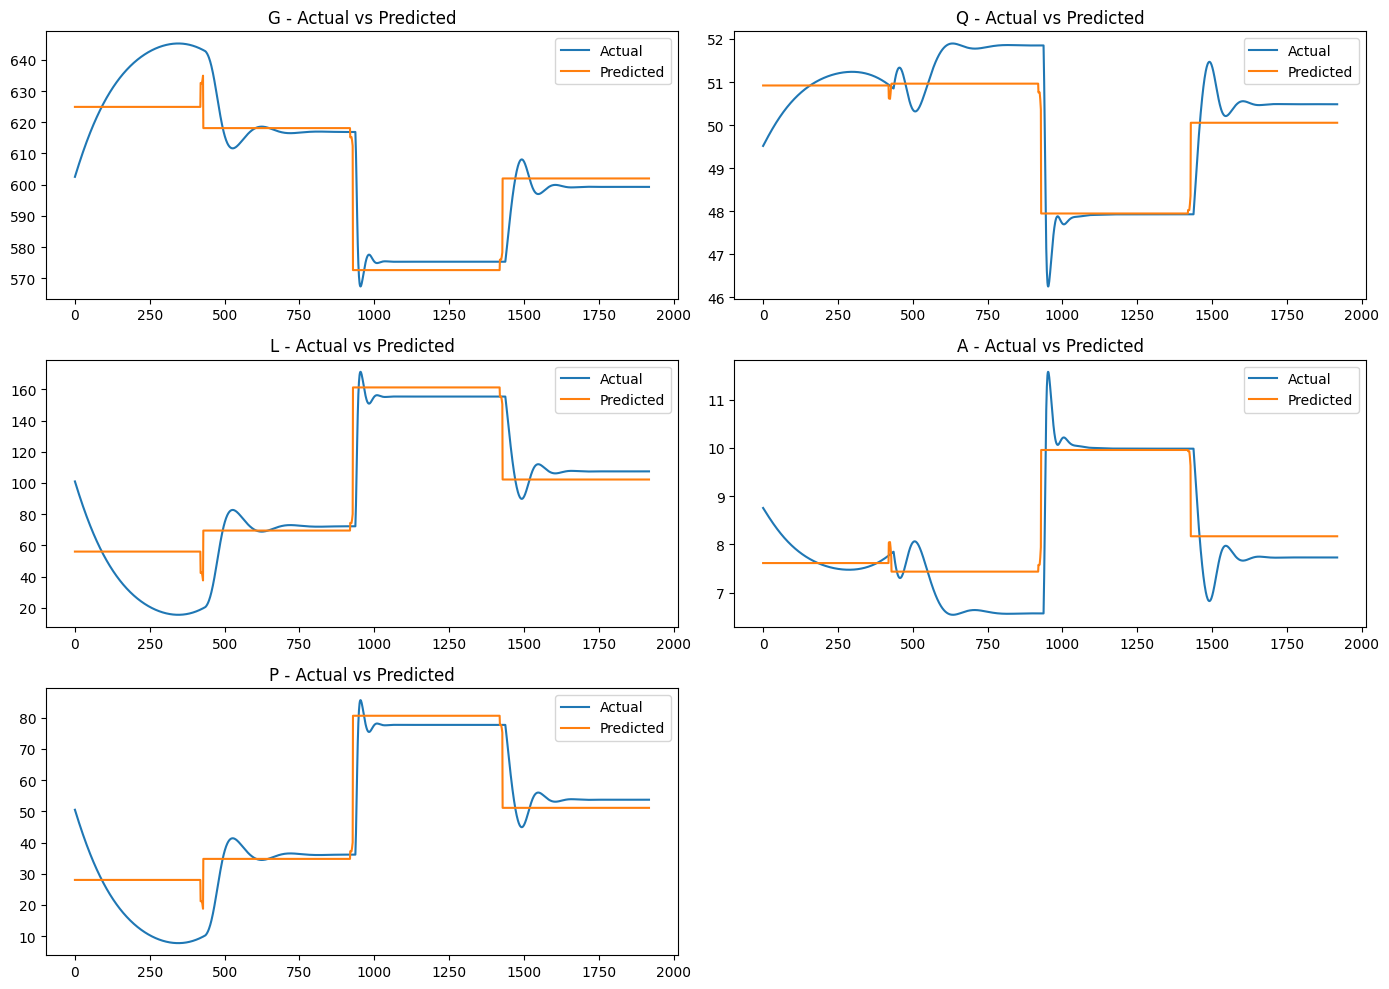

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'New Craven data.csv'
data = pd.read_csv(file_path)

# Select relevant columns
input_columns = ['pH', 'T', 'DO', 'F']
output_columns = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data[input_columns + output_columns])

# Convert the normalized data back to a DataFrame
data_normalized = pd.DataFrame(data_normalized, columns=input_columns + output_columns)

# Function to create sequences
def create_sequences_for_regression(data, input_columns, output_columns, sequence_length=10):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        input_seq = data[input_columns].iloc[i:i+sequence_length].values.flatten()
        output_seq = data[output_columns].iloc[i+sequence_length].values
        X.append(input_seq)
        y.append(output_seq)
    return np.array(X), np.array(y)

# Prepare the data for the regression model
sequence_length = 10
X, y = create_sequences_for_regression(data_normalized, input_columns, output_columns, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_rescaled = scaler.inverse_transform(np.hstack((np.zeros((y_pred.shape[0], len(input_columns))), y_pred)))[:, len(input_columns):]
y_test_rescaled = scaler.inverse_transform(np.hstack((np.zeros((y_test.shape[0], len(input_columns))), y_test)))[:, len(input_columns):]

# Save the actual and predicted values to a DataFrame
results = pd.DataFrame({
    'G_actual': y_test_rescaled[:, 0], 'G_pred': y_pred_rescaled[:, 0],
    'Q_actual': y_test_rescaled[:, 1], 'Q_pred': y_pred_rescaled[:, 1],
    'L_actual': y_test_rescaled[:, 2], 'L_pred': y_pred_rescaled[:, 2],
    'A_actual': y_test_rescaled[:, 3], 'A_pred': y_pred_rescaled[:, 3],
    'P_actual': y_test_rescaled[:, 4], 'P_pred': y_pred_rescaled[:, 4]
})

# Calculate relevant metrics
metrics = {}
for column in output_columns:
    actual = results[f"{column}_actual"]
    pred = results[f"{column}_pred"]
    metrics[column] = {
        'MSE': mean_squared_error(actual, pred),
        'R2': r2_score(actual, pred)
    }

metrics_df = pd.DataFrame(metrics).T

# Visualization
plt.figure(figsize=(14, 10))
for i, column in enumerate(output_columns):
    plt.subplot(3, 2, i+1)
    plt.plot(results[f"{column}_actual"], label='Actual')
    plt.plot(results[f"{column}_pred"], label='Predicted')
    plt.title(f"{column} - Actual vs Predicted")
    plt.legend()

plt.tight_layout()
plt.show()

# Save the metrics to a file or display them
metrics_df.to_csv('model_metrics.csv', index=True)
results.to_csv('model_predictions.csv', index=False)


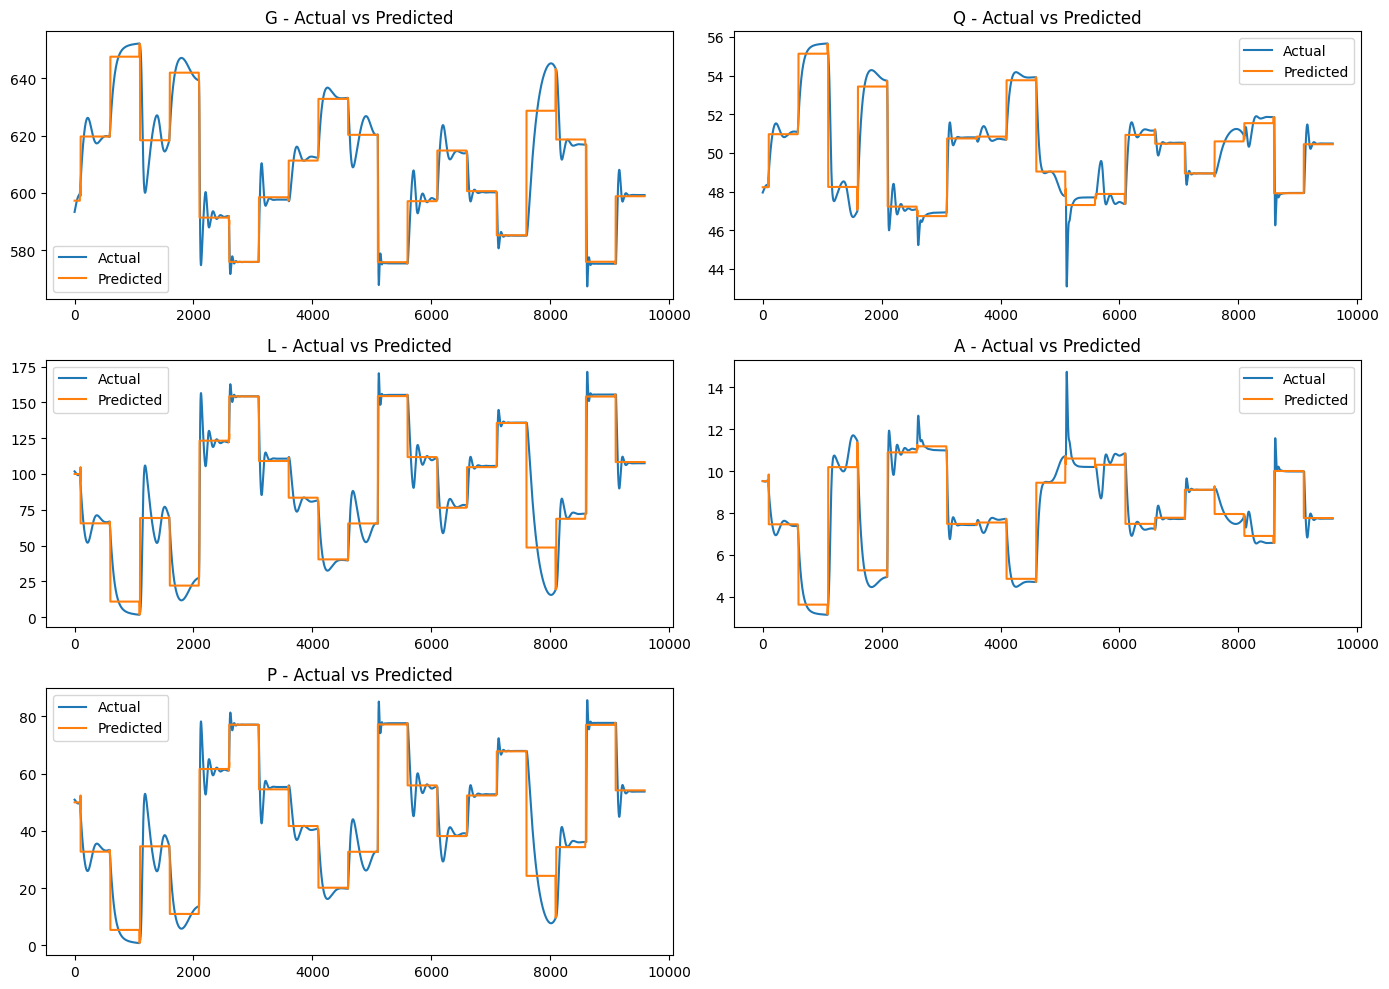

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'New Craven data.csv'
data = pd.read_csv(file_path)

# Select relevant columns
input_columns = ['pH', 'T', 'DO', 'F']
output_columns = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data[input_columns + output_columns])
data_normalized = pd.DataFrame(data_normalized, columns=input_columns + output_columns)

# Create lag features
def create_lagged_features(data, input_columns, output_columns, lag=3):
    df = data.copy()
    for col in input_columns:
        for i in range(1, lag+1):
            df[f'{col}_lag{i}'] = df[col].shift(i)
    df = df.dropna().reset_index(drop=True)
    return df

# Create lagged features with a lag of 3
lagged_data = create_lagged_features(data_normalized, input_columns, output_columns, lag=3)

# Function to create sequences
def create_sequences_for_regression(data, input_columns, output_columns, sequence_length=10):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        input_seq = data[input_columns].iloc[i:i+sequence_length].values.flatten()
        output_seq = data[output_columns].iloc[i+sequence_length].values
        X.append(input_seq)
        y.append(output_seq)
    return np.array(X), np.array(y)

# Prepare the data for the regression model with lagged features
sequence_length = 10
X, y = create_sequences_for_regression(lagged_data, lagged_data.columns.difference(output_columns), output_columns, sequence_length)

# Train the Random Forest model on the entire dataset
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Predict in a rolling fashion for the entire dataset
def rolling_predictions(model, data, input_columns, output_columns, sequence_length):
    predictions = []
    for i in range(len(data) - sequence_length):
        input_seq = data[input_columns].iloc[i:i+sequence_length].values.flatten().reshape(1, -1)
        pred = model.predict(input_seq)
        predictions.append(pred.flatten())
    return np.array(predictions)

# Get rolling predictions
rolling_preds = rolling_predictions(model, lagged_data, lagged_data.columns.difference(output_columns), output_columns, sequence_length)

# Inverse transform the predictions and actual values
y_pred_rescaled = scaler.inverse_transform(np.hstack((np.zeros((rolling_preds.shape[0], len(input_columns))), rolling_preds)))[:, len(input_columns):]
y_actual_rescaled = scaler.inverse_transform(np.hstack((np.zeros((y.shape[0], len(input_columns))), y)))[:, len(input_columns):]

# Save the actual and predicted values to a DataFrame
results = pd.DataFrame({
    'G_actual': y_actual_rescaled[:, 0], 'G_pred': y_pred_rescaled[:, 0],
    'Q_actual': y_actual_rescaled[:, 1], 'Q_pred': y_pred_rescaled[:, 1],
    'L_actual': y_actual_rescaled[:, 2], 'L_pred': y_pred_rescaled[:, 2],
    'A_actual': y_actual_rescaled[:, 3], 'A_pred': y_pred_rescaled[:, 3],
    'P_actual': y_actual_rescaled[:, 4], 'P_pred': y_pred_rescaled[:, 4]
})

# Calculate relevant metrics
metrics = {}
for column in output_columns:
    actual = results[f"{column}_actual"]
    pred = results[f"{column}_pred"]
    metrics[column] = {
        'MSE': mean_squared_error(actual, pred),
        'R2': r2_score(actual, pred)
    }

metrics_df = pd.DataFrame(metrics).T

# Visualization
plt.figure(figsize=(14, 10))
for i, column in enumerate(output_columns):
    plt.subplot(3, 2, i+1)
    plt.plot(results[f"{column}_actual"], label='Actual')
    plt.plot(results[f"{column}_pred"], label='Predicted')
    plt.title(f"{column} - Actual vs Predicted")
    plt.legend()

plt.tight_layout()
plt.show()

# Save the metrics to a file or display them
metrics_df.to_csv('model_metrics_v2.csv', index=True)
results.to_csv('model_predictions_v2.csv', index=False)
